In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as st
import yfinance as yf


import seaborn as sns
import heapq

In [2]:
def get_daily_ohlcv2(tickers,years=4):
    outo=[]
    outh=[]
    outl=[]
    outc=[]
    outv=[]
    oute=[]
    outdf=[]
    months=str(years*12)
    for ticker in tickers:
        tick = yf.Ticker(ticker)
        df=tick.history(period=months+"mo")
        df=df.reset_index()
        df.dropna(inplace=True)
        outdf.append(df)
    return outdf

In [3]:
def concat_tickers(tickers):
    out=""
    for ticker in tickers:
        out=out+" "+ticker
    return out

In [4]:
def addNS(ticks):
    return [tick+'.NS' for tick in ticks]
s = np.random.normal(0, 1, 1000)
s2 = np.random.normal(0, 1, 1000)

In [5]:
def sh(a):
    a2=a.copy()
    np.random.shuffle(a2)
    return a2

def aggsh(a):
    out=[a[0]]+list(sh(di(a)))
    return accumulate(out)

def sharpe(a):
    return np.mean(a)/np.std(a)

def sharpe2(agg):
    a=di(agg)
    return sharpe(a)*np.sqrt(len(a))

def sigrobust(sigactual,mush,sigmash):
    return np.sign(sigactual)*(abs(sigactual)-mush)/sigmash

def di(a):
    return np.asarray([a[i+1]-a[i] for i in range(len(a)-1)])

In [6]:
def getleneq(array):
    lens=[len(x) for x in array] 
    maxlen=max(lens)
    out=[]
    for lst in array:
        if len(lst)==maxlen:
            out.append(lst)
    return maxlen,np.asarray(out)
def listsum(vecs):
    vecs=getleneq(vecs)[1]
    out=np.asarray(vecs[0])
    for i in range(1,len(vecs)):
        out=out+np.asarray(vecs[i])
    return np.asarray(out)

def accumulate(a):
    out=[a[0]]
    for i in range(1,len(a)):
        out.append(out[i-1]+a[i])
    return np.asarray(out)

def listmean(a):
    return [np.mean(a[i]) for i in range(len(a))]

def klargest(nums, k):
    h = []
    for e in nums:
        heapq.heappush(h, (-e, e))
    klarg=[]
    for i in range(k):
        w, e = heapq.heappop(h)
        klarg.append(e)
    return np.asarray(klarg)

def trunc_sig(signals,trades=5):
    klargabs=klargest(abs(signals),trades)
    out=[]
    for i in range(len(signals)):
        if abs(signals[i]) in klargabs:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])


def trunc_siglo(signals,trades=5):
    klarg=klargest(signals,trades)
    out=[]
    for i in range(len(signals)):
        if signals[i] in klarg and signals[i]>0:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])

def my_kendall_trend(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(np.sign(a[i]-a[j]))
    numpos=len([el for el in out if el>0 ])
    numneg=len([el for el in out if el<0 ])
    return (numpos-numneg)/len(out)

def di_atoa(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out


def di_atoa2(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out/np.std(a)

def ns_mean(a,opt=3):
    if opt==-1:
        return np.mean(a)
    
    if opt==0:
        return np.mean(a)-np.mean(di(a))
    
    elif opt==1:
        halflen=round(len(a)/2)
        if abs(np.mean(a[:halflen]))<=abs(np.mean(a[halflen:])):
            return np.mean(a[:halflen])
        else:
            return 0
    elif opt==2:
        return np.mean(a)-np.mean(di_atoa(a))
    elif opt==3:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==4:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna*kt
        else:
            return 0
    elif opt==5:
        return kalman_mean(a)
    elif opt==-2:
        return np.mean(a)+np.mean(di_atoa(a))
    elif opt==-3:
        kt=np.mean(di_atoa(a))
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==-4:
        return np.mean(a)+np.mean(di_atoa2(a))
    
    elif opt==-5:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-6:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        kt3=np.mean(di_atoa(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
    elif opt==-7:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-8:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        kt3=np.mean(my_kendall_trend(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
        

def sk_minfo(x,y,norm=True):
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0] 
    iXY=metrics.mutual_info_score(None,None,contingency=cXY) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0]) 
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return iXY


def sk_mic(x,y,norm=True):
    estbins=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    bXYs=[i for i in range(20)]
    iXYs=[]
    for bXY in bXYs:
        cXY=np.histogram2d(x,y,bXY)[0] 
        iXYs.append(metrics.mutual_info_score(None,None,contingency=cXY)) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0])
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return max(iXYs)


def numBins(nObs,corr=None): 
    if corr is None: 
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.) 
        b=round(z/6.+2./(3*z)+1./3) 
    else:  
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5) 
        b=min(b,50)
    return int(b)

def eqwt_memb(logrets,lb=10,cost=0.0,long=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if long:
            pred=np.ones(len(lrs[:,-2+i:i]))
        else:
            pred=-np.ones(len(lrs[:,-2+i:i]))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def random_memb(logrets,lb=10,cost=0.0,longonly=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        randsh=sh(np.arange(len(lrs)))[0]
        randsgn=sh([1,-1])[0]
        if longonly:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])
        else:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])*randsgn
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        #
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def perment(a,m=4,tau=1):    
    return entrp.permutation_entropy(a,m,tau)
def sampent(ts,m=4,r=0.2):
    std_ts = np.std(ts)
    return entrp.sample_entropy(ts, m, r * std_ts)


In [7]:
def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        ret = ret - np.mean(ret)
    dot_prod = np.mean(np.sign(reg[:-delay]*ret2[delay:]))*np.sign(reg[-1])
    return dot_prod


def theta_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2th(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def perm_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def corrcoef_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(np.corrcoef(reg,sh(ret))[0][1])
    return np.mean(outsh)

def skminfo_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sk_minfo(reg,sh(ret)))
    return np.mean(outsh)

def thetamem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(theta_mem(reg,sh(ret))))
    return np.mean(outsh)

def perm_mem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(perm_mem(reg,sh(ret))))
    return np.mean(outsh)


In [8]:
def tp_memb(alphas,logrets,lbmom=20,lf=1,trades=-1,cost=0.0,signed=False,longonly=True,nsopt=-1):
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lbmom,n-mmax-1,mmax+1):
        if signed:
            
            pred=np.sign(listmean(alphas[:,-lbmom+i:i]))
        else:
            
            pred=listmean(alphas[:,-lbmom+i:i])
        if longonly:
            pred=np.heaviside(pred,0)*pred
        if trades>0:
            pred=trunc_siglo(pred,trades)
        
        pred=np.nan_to_num(pred,nan=0)
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=np.asarray(listmean(lrs[:,i:i+lf]))
        out.append(np.dot(pred,np.e**(y)-1))
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    dot_prod = ns_mean(np.sign(reg[:-delay]*ret2[delay:]),nsopt)*np.sign(reg[-1])
    return dot_prod

def multibinfunc2th(reg,ret,dmn=True,opt=0,trig=0,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    if opt==0:
        dot_prod = ns_mean(np.heaviside(np.sign(reg[:-delay])*np.sign(reg[-1]),0)*np.sign(ret2[delay:]),nsopt)
    if abs(dot_prod)>trig:
        return dot_prod
    else:
        return 0

def multibinpred2(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibinpred2th(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2th(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibin2pt_memb(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False,delay=1):
    
    mmax=0
    n,lrs=getleneq(logrets)
    n,rgs=getleneq(regs)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if th:
            pred=multibinpred2th(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        else:
            pred=multibinpred2(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        if trades>0:
            if longonly:
                pred=np.asarray(trunc_siglo(pred,trades))
            else:
                pred=np.asarray(trunc_sig(pred,trades))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        y=lrs[:,i]
       
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def multibin2pt_membml(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False):
    mb1=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=1)
    mb2=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=2)
    mb3=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=3)
    mb4=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=4)
    mb5=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=5)
    return (mb1+mb2+mb3+mb4+mb5)/5

In [9]:
def get_signalact(alphas,logrets,lb=20,delay=1,trades=-1,nsopt=-1,dmn=True,longonly=True,th=False):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=nsopt,th=th,longonly=longonly,dmn=dmn,delay=delay)
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=trades,longonly=longonly)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
        thm=theta_mem(alpha,returns)
        pm=perm_mem(alpha,returns)
        
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem


def get_signalsh(alphas,logrets,lb=20,delay=1):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb)
    tpmem=tp_memb(alphas,logrets,lbmom=lb)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        try:
            outminfo.append(skminfo_sh(np.asarray(alpha[:-1]),np.asarray(returns[1:])))
        except:
            outminfo.append(0)
        thm=thetamem_sh(alpha,returns)
        pm=permmem_sh(alpha,returns)
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem   

In [10]:
def get_signalact2(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=1,longonly=longonly)
    tpmem2=tp_memb(alphas,logrets,lbmom=lb,trades=5,longonly=longonly)
    multimem1=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem2=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem3=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem4=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem5=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem6=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem7=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem8=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=True)
    
    eqmem=eqwt_memb(logrets)
    
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [11]:
def get_signalact2_random(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    #alphas may take some training data; so log returns can be adjusted accordingly
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=random_memb(logrets)
    tpmem2=random_memb(logrets)
    multimem1=random_memb(logrets)
    multimem2=random_memb(logrets)
    multimem3=random_memb(logrets)
    multimem4=random_memb(logrets)
    multimem5=random_memb(logrets)
    multimem6=random_memb(logrets)
    multimem7=random_memb(logrets)
    multimem8=random_memb(logrets)
    eqmem=eqwt_memb(logrets)
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],sh(returns[delay:]))[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],sh(returns[delay:])))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [12]:
from scipy.stats import rankdata
def rankdata_2d(array2d,axis=0):
    """
    Input: 2d array
    Output:
    axis=0: time series rank
    axis=1: cross sectional rank
    """
    if axis==0:
        return np.asarray([rankdata(array1d) for array1d in array2d])
    elif axis==1:
        array2dt=np.transpose(array2d)
        return np.transpose([rankdata(array1d) for array1d in array2dt])
    
#RTime Series Rank
# def ts_rank(qty,window=10):
#     n,qty=getleneq(qty)[1]
#     out=[]
#     for i in range(n):
#         out.append(rankdata_2d(qty[:,i-window:i])[:,-1])
#     return out

#Cross Sectional Rank, also called 'Rank' by Kakushadze
# def cs_rank(qty):
#     """
#     Input: 2-d array of qty
#     Output: 2-d array of ranks
#     """
#     n,qty=getleneq(qty)
#     return rankdata_2d(qty,axis=1)

#Calculate and store the Log Returns
def logrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def idlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Intraday Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def onlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Overnight Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def get_opens(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Open'])
    return getleneq(sectalpha1)[1]

def get_volumes(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Volume'])
    return getleneq(sectalpha1)[1]

In [13]:
#These are technical alphas of the form 
#talpha 1: ln(high/open)
#talpha 2: ln(low/open)
#talpha 3: ln(high/close)
#talpha 4: ln(low/close)
def talpha1(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of alphas [alpha(stock1),...alpha(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(list(np.log(ohlcv_data[i]['High']/ohlcv_data[i]['Open'])))
    return getleneq(sectalpha1)[1]

def talpha2(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of alphas [alpha(stock1),...alpha(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Low']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def talpha3(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of alphas [alpha(stock1),...alpha(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['High']/ohlcv_data[i]['Close']))
    return getleneq(sectalpha1)[1]

def talpha4(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of alphas [alpha(stock1),...alpha(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Low']/ohlcv_data[i]['Close']))
    return getleneq(sectalpha1)[1]

def talpha5(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of alphas [alpha(stock1),...alpha(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['High']/ohlcv_data[i]['Low'])-np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close']))
    return getleneq(sectalpha1)[1]

#ralpha 1 or high to high log rets
#ln(high(t+1)/high(t))
def ralpha1(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of High-High Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['High']/ohlcv_data[i]['High'].shift(1)))
    return getleneq(sectalpha1)[1]

#ralpha 2 or high to high log rets
#ln(low(t+1)/low(t))
def ralpha2(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Low-Low Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Low']/ohlcv_data[i]['Low'].shift(1)))
    return getleneq(sectalpha1)[1]

#Kakushadze Alpha #3
#-1*correlation(rank(open),rank(volume),10)
def kalpha3(ohlcv_data,window=10):
    opranks=cs_rank(get_opens(ohlcv_data))
    volranks=cs_rank(get_volumes(ohlcv_data))
    n,opranks=getleneq(opranks)
    out=[]
    for i in range(len(opranks)):
        out.append(np.asarray([-np.corrcoef(opranks[i][j-window:j],volranks[i][j-window:j])[0][1] for j in range(window,len(opranks[i]))]))
    return np.asarray(out)
#ka3=kalpha3(sec2_data)
#%%time
#sig=get_signalact(kalpha3(sec2_data),logrets(sec2_data)[:,-996:],delay=1,trades=5,nsopt=-1)
#plt.plot(sig[4])
#sharpe2(sig[4])
#plt.plot(sig[5])
#Following are GOOD
#%%time
#sig=get_signalact(logrets(sec2_data),logrets(sec2_data),delay=1,trades=1,nsopt=-8)
#plt.plot(sig[4])
#sharpe2(sig[4])
#%%time
#sig=get_signalact(talpha1(sec2_data),onlogrets(sec2_data),delay=1,trades=1)
#%%time
#sig=get_signalact(talpha4(sec2_data),onlogrets(sec2_data),delay=1,trades=2,th=True)
#%%time
#sig=get_signalact(idlogrets(sec2_data),onlogrets(sec2_data),delay=1,trades=1,th=True)
#%%time
#sig=get_signalact(logrets(sec2_data),logrets(sec2_data),delay=1,trades=1,nsopt=3)
#plt.plot(sig[4])
#sharpe2(sig[4])
#%%time
#sig=get_signalact(logrets(sec2_data),logrets(sec2_data),delay=1,trades=3,nsopt=-1)

In [14]:
sector_names=["S5COND","S5CONS","S5HLTH","S5INDU","S5INFT","S5MATR","S5REAS","S5TELS","S5UTIL","SPF","SPN"]


sec=[[] for i in range(len(sector_names))]

sec[10]=["APA","COG","COP","CVX","CXO","DVN","EOG","EQT","FTI","HAL","HES","HFC","HP","KMI","MPC","MRO","NOV","OKE","OXY","PSX","PXD","SLB","VLO","WMB","XEC","XOM"]

In [15]:
ohlcv_data=get_daily_ohlcv2(sec[10], 4)

- CXO: No data found, symbol may be delisted


In [16]:
len(ohlcv_data)

26

In [17]:
def talpha3(ohlcv_data):
    
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['High']/ohlcv_data[i]['Close']))
    return getleneq(sectalpha1)[1]

1008
25
1008
25
1008
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1008
25
1008
25
1008
25
1008
25
1008
25
1008
25
1008
25
1008
25


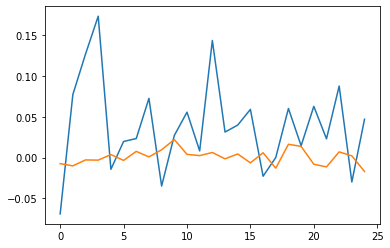

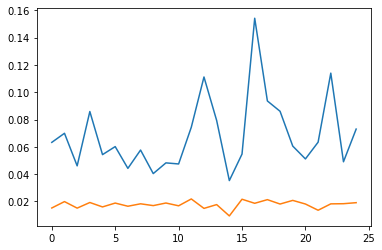

Wall time: 1min 31s


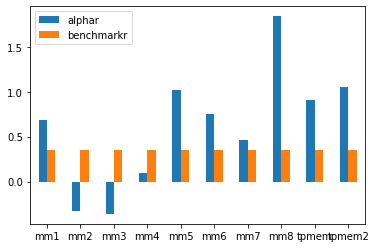

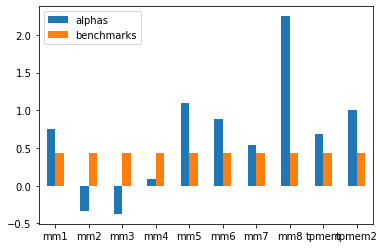

In [18]:
%%time
sig=get_signalact2(talpha3(ohlcv_data),logrets(ohlcv_data),delay=1)

In [38]:
def kalpha3(ohlcv_data,window=10):
    opranks=cs_rank(get_opens(ohlcv_data))
    volranks=cs_rank(get_volumes(ohlcv_data))
    n,opranks=getleneq(opranks)
    out=[]
    for i in range(len(opranks)):
        out.append(np.asarray([-np.corrcoef(opranks[i][j-window:j],volranks[i][j-window:j])[0][1] for j in range(window,len(opranks[i]))]))
    return np.asarray(out)

c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


998
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


998
25
998
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


998
25
998
25
998
25
998
25
998
25
998
25
998
25
998
25


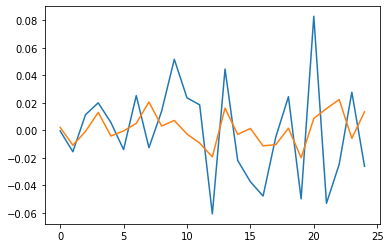

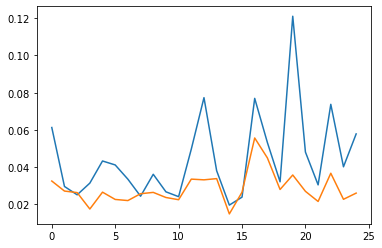

Wall time: 1min 53s


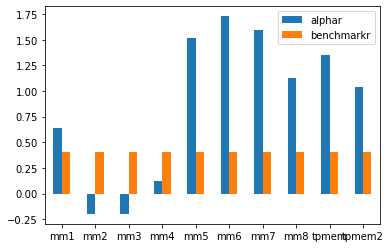

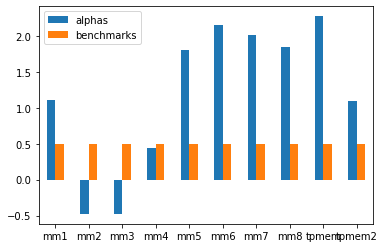

In [39]:
%%time
sig=get_signalact2(kalpha3(ohlcv_data),logrets(ohlcv_data),delay=1)

In [17]:
# ((close - open) / ((high - low) + .001))
def kalpha101(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        kalpha.append(np.asarray((ohlcv_data[i]['Close']-ohlcv_data[i]['Open'])/((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])+(1e-3))))
    return getleneq(kalpha)[1]

In [18]:
kalpha101(ohlcv_data)

array([[-4.95268046e-01, -8.25565488e-03, -3.36184820e-01, ...,
         7.34052602e-01,  8.21309750e-01, -1.77134399e-01],
       [-3.06848764e-01,  1.02191386e-14, -1.51821276e-01, ...,
        -1.70315622e-01,  7.52863467e-01, -8.19965198e-01],
       [-2.84962031e-01,  4.10341188e-01, -2.62136434e-01, ...,
         4.92136286e-01,  7.12315105e-01, -3.39478859e-01],
       ...,
       [ 5.80240592e-01, -6.71166226e-01, -2.30201033e-01, ...,
         3.38682201e-01, -1.17299092e-01,  0.00000000e+00],
       [-2.22059147e-01,  4.17536375e-01, -5.37262454e-01, ...,
        -9.57508423e-02,  5.12184553e-01, -6.06061940e-01],
       [-4.11923424e-01, -6.40003680e-01, -2.99466635e-01, ...,
         2.92806603e-01,  6.11828211e-01, -5.73541056e-01]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


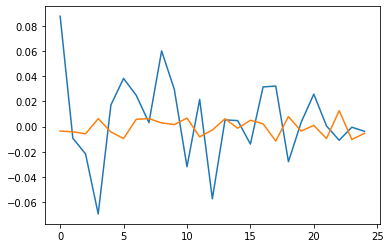

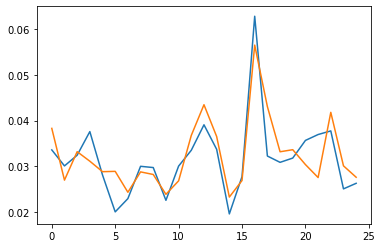

Wall time: 1min 35s


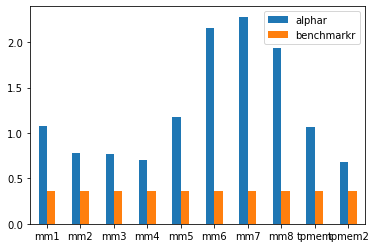

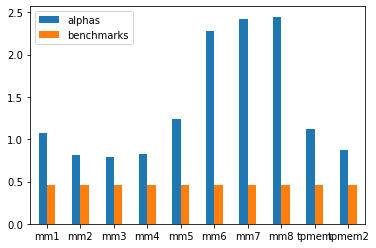

In [19]:
%%time
sig=get_signalact2(kalpha101(ohlcv_data),logrets(ohlcv_data),delay=1)

In [20]:
# ((-1 * ((low - close) * (open^5))) / ((low - high) * (close^5))) 
def kalpha54(ohlcv_data, window=10):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        kalpha.append(np.asarray(-((ohlcv_data[i]['Low']-ohlcv_data[i]['Close'])*(ohlcv_data[i]['Open']**5))/((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])*(ohlcv_data[i]['Close'])**5)))
    return getleneq(kalpha)[1]

1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


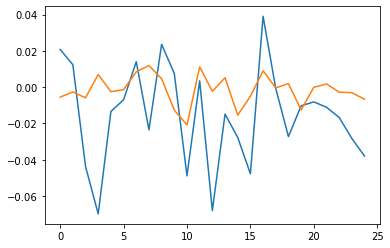

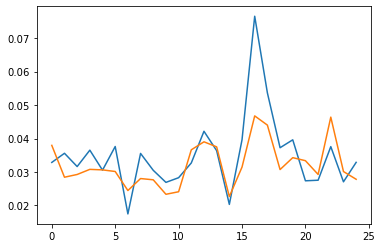

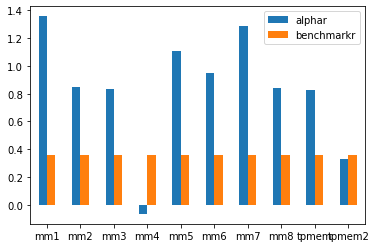

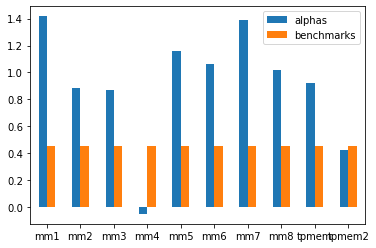

In [21]:
sig=get_signalact2(kalpha54(ohlcv_data),logrets(ohlcv_data), delay=1)

In [22]:
# (((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < (-1 * 0.05)) ? 1 : ((-1 * 1) * (close - delay(close, 1))))


def kalpha51(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        inner=(((ohlcv_data[i]['Close'].shift(20)-ohlcv_data[i]['Close'].shift(10))/10)-((ohlcv_data[i]['Close'].shift(10)-ohlcv_data[i]['Close'])/10))
        signals=np.where(inner<-0.05, -(ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].shift(1)), 0)
        kalpha.append(np.asarray(signals))
    return getleneq(kalpha)[1]
        

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


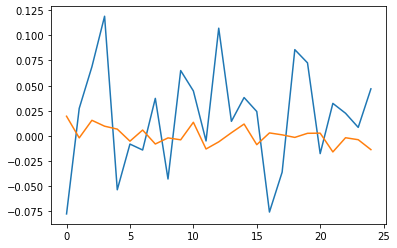

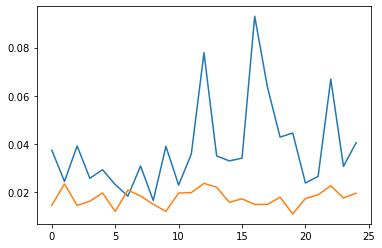

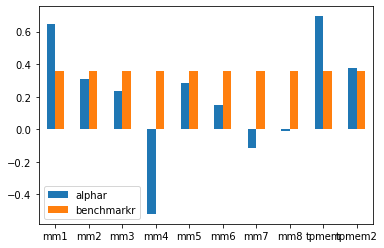

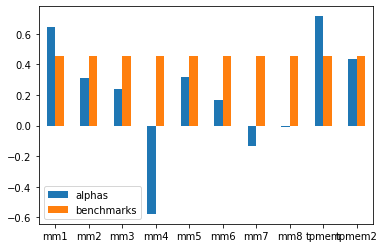

In [23]:
sig=get_signalact2(kalpha51(ohlcv_data),logrets(ohlcv_data), delay=1)

In [29]:
def cs_rank(df):
    return df.rank(pct=True)

In [30]:
def ts_rank(df, window):
    return (df.rolling(window).apply(lambda x: x.rank().iloc[-1]))

In [31]:
# ((((-1 * ts_min(low, 5)) + delay(ts_min(low, 5), 5))*rank(((sum(returns, 240)-sum(returns, 20)) / 220)))* ts_rank(volume, 5))


def kalpha52(ohlcv_data):
    kalpha=[]

    for i in range(len(ohlcv_data)):

        a=(ohlcv_data[i]['Low'].rolling(window=5).min()+((ohlcv_data[i]['Low']).rolling(window=5).min().shift(5)))
        b=cs_rank((np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)).rolling(window=240).sum())-(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)).rolling(window=20).sum()))/220
        c=ts_rank(ohlcv_data[i]['Volume'], 5)
        kalpha.append(np.asarray((a*b)*c))
    return getleneq(kalpha)[1]
           
    

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


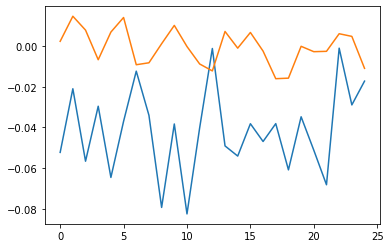

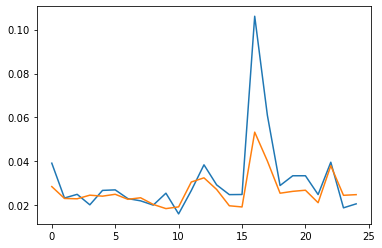

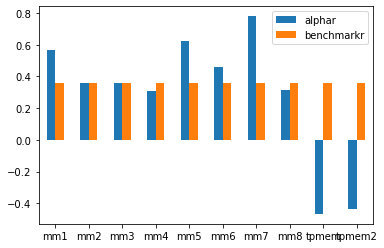

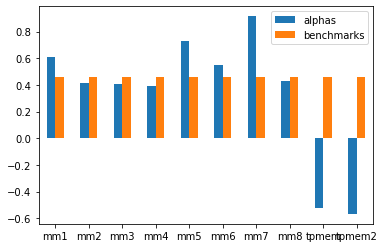

In [32]:
sig=get_signalact2(kalpha52(ohlcv_data),logrets(ohlcv_data), delay=1)

In [33]:
# (-1 * delta((((close - low) - (high - close)) / (close - low)), 9)) 

def kalpha53(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=(((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'])-(ohlcv_data[i]['High']-ohlcv_data[i]['Close']))/(ohlcv_data[i]['Close']-ohlcv_data[i]['Low']))
        kalpha.append(-np.asarray(a-a.shift(9)))
    return getleneq(kalpha)[1]

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract


1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\function_base.py:134: RuntimeWarning: overflow encountered in double_scalars
  delta = stop - start
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\users\neha\appdata\local\programs\python\python37\lib\site-packa

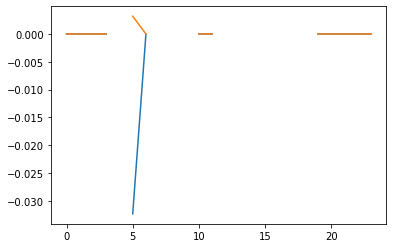

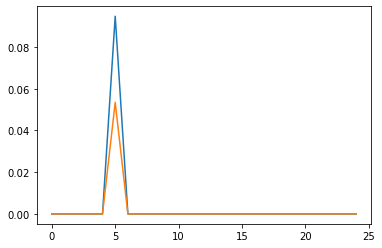

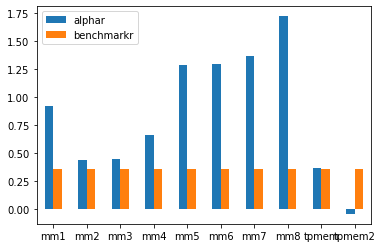

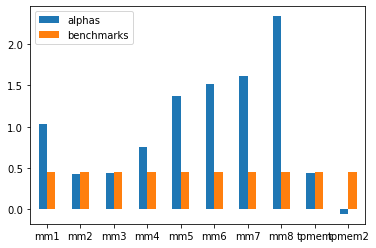

In [34]:
sig=get_signalact2(kalpha53(ohlcv_data),logrets(ohlcv_data), delay=1)

In [35]:
def corr(x, y, window):
    return x.rolling(window).corr(y)

In [36]:
# (-1 * correlation(rank(((close - ts_min(low, 12)) / (ts_max(high, 12) - ts_min(low, 12)))), rank(volume), 6))

def kalpha55(ohlcv_data):
    kalpha=[]
    
    for i in range(len(ohlcv_data)):
        a=cs_rank((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'].rolling(window=12).min())/(ohlcv_data[i]['High'].rolling(window=12).max()-ohlcv_data[i]['Low'].rolling(window=12).min()))
        b=cs_rank(ohlcv_data[i]['Volume'])
        
        kalpha.append(np.asarray(-(corr(a, b, 6))))
    return getleneq(kalpha)[1]


In [189]:
kalpha55(ohlcv_data)

array([[        nan,         nan,         nan, ...,  0.73059429,
         0.36269125,  0.29378741],
       [        nan,         nan,         nan, ...,  0.17045522,
        -0.24960801, -0.22662006],
       [        nan,         nan,         nan, ...,  0.61426181,
        -0.16114937,  0.57471765],
       ...,
       [        nan,         nan,         nan, ..., -0.27148988,
        -0.34150061,  0.09865957],
       [        nan,         nan,         nan, ...,  0.34598664,
         0.08592883,  0.18967528],
       [        nan,         nan,         nan, ...,  0.25575442,
         0.04504731,  0.45415031]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


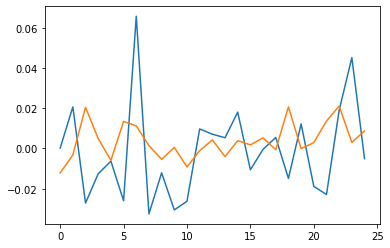

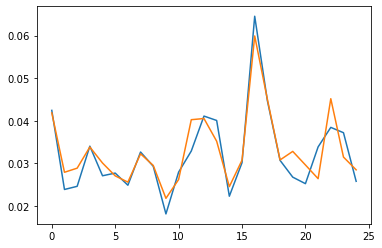

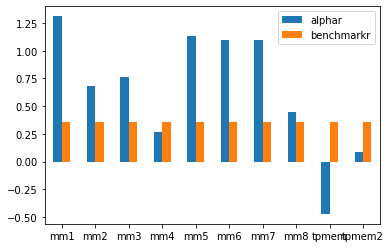

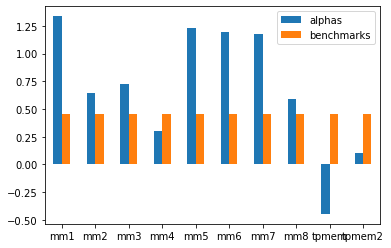

In [37]:
sig=get_signalact2(kalpha55(ohlcv_data),logrets(ohlcv_data), delay=1)

In [38]:
# (0 - (1 * (rank((sum(returns, 10) / sum(sum(returns, 2), 3))) * rank((returns * cap))))) 
def kalpha56(ohlcv_data):
    pass

In [39]:
from talib import WMA

In [40]:
def vwap1(ohlcv_data):
    for i in range(len(ohlcv_data)):
        price=(ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3
        pv=price*ohlcv_data[i]['Volume']
        vwap=pv.cumsum()/(ohlcv_data[i]['Volume'].cumsum())
    return vwap

In [43]:
vwap1(ohlcv_data)

0       64.522685
1       64.779852
2       64.839513
3       64.880616
4       64.562054
          ...    
1002    53.424395
1003    53.428428
1004    53.431953
1005    53.436699
1006    53.439419
Length: 1007, dtype: float64

In [115]:
# def p(ohlcv_data):
    
#     for i in range(len(ohlcv_data)):
#         a=ohlcv_data[i]['Close']-vwap1(ohlcv_data)
        
#     return a


In [116]:
# p(ohlcv_data)

0      -0.064562
1       0.001078
2       0.022128
3       0.352241
4      -0.321850
          ...   
1002    3.895605
1003    1.921570
1004    2.528046
1005    4.323299
1006    3.670581
Length: 1007, dtype: float64

In [62]:
# type(ohlcv_data[0])

pandas.core.frame.DataFrame

In [59]:
# df = pd.DataFrame(ohlcv_data)
# print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [61]:
# df.shape

(26, 1)

In [77]:
# def ts_argmax(ohlcv_data, window):
#     for i in range(len(ohlcv_data)):
#         a=ohlcv_data[i]['Close'].rolling(window).apply(np.argmax).add(1)
#         argmax=a.fillna(0)
#     return argmax

In [78]:
# ts_argmax(ohlcv_data, 30)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1002    16.0
1003    15.0
1004    14.0
1005    13.0
1006    12.0
Name: Close, Length: 1007, dtype: float64

In [91]:
# def f(ohlcv_data):
#     for i in range(len(ohlcv_data)):
#         rank=cs_rank(ohlcv_data[i]['Close'].rolling(window=30).apply(np.argmax).add(1)).fillna(0)
        
#     return rank

In [100]:
# a=f(ohlcv_data)
# b = np.array(a)

In [93]:
# type()

function

In [112]:
# decay_linear(b,2)

array([0.        , 0.        , 0.        , ..., 0.39195637, 0.3728698 ,
       0.35429448])

In [126]:
# def x(ohlcv_data):
#     for i in range(len(ohlcv_data)):
#         a=(ohlcv_data[i]['Close']-vwap1(ohlcv_data))
#         b=cs_rank(ohlcv_data[i]['Close'].rolling(window=30).apply(np.argmax).add(1)).fillna(0)
#     return b

In [129]:
# a=x(ohlcv_data)
# d=pd.DataFrame(a)

In [130]:
# d.isnull().values.any()

False

In [150]:
# def o(ohlcv_data):
#     for i in range(len(ohlcv_data)):
#         a=(ohlcv_data[i]['Close']-vwap1(ohlcv_data))
#         b=cs_rank(ohlcv_data[i]['Close'].rolling(window=30).apply(np.argmax).add(1)).fillna(0)
#         x = np.array(b)
#         y=np.nan_to_num(x)
#         z = np.isnan(y)
        
        
        
# #         c=decay_linear(y, 2)
        
#     return z
        
        
    

In [151]:
# o(ohlcv_data)

array([False, False, False, ..., False, False, False])

In [180]:
# def ob(ohlcv_data):
    
#     for i in range(len(ohlcv_data)):
#         a=(ohlcv_data[i]['Close']-vwap1(ohlcv_data))
#         b=cs_rank(ohlcv_data[i]['Close'].rolling(window=30).apply(np.argmax).add(1)).fillna(0)
#         y=pd.DataFrame(b)
# #         y = np.array(b)
# #         y=np.nan_to_num(x)
#         o=y.apply(lambda x: WMA(x, timeperiod=2))
#         ot=o.fillna(0)
#         t=-a/b
#         out=t.fillna(0)
        
        
#     return out

In [181]:
# ob(ohlcv_data)

0             inf
1            -inf
2            -inf
3            -inf
4             inf
          ...    
1002    -9.180486
1003    -4.745697
1004    -6.558168
1005   -11.794104
1006   -10.542815
Length: 1007, dtype: float64

In [194]:
# (0 - (1 * ((close - vwap) / decay_linear(rank(ts_argmax(close, 30)), 2))))

def kalpha57(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=(ohlcv_data[i]['Close']-vwap1(ohlcv_data))
        b=cs_rank(ohlcv_data[i]['Close'].rolling(window=30).apply(np.argmax).add(1)).fillna(0)
        y=pd.DataFrame(b)
        o=y.apply(lambda x: WMA(x, timeperiod=2))
        ot=o.fillna(0)
        t=-a/b
        out=t.fillna(0)
        kalpha.append(np.asarray(out))
        
        
    return getleneq(kalpha)[1]

In [201]:
kalpha57(ohlcv_data)[1:]

array([[          inf,           inf,           inf, ...,   63.89367204,
          65.92515751,   70.1880849 ],
       [          inf,           inf,           inf, ...,   -2.01231209,
          -7.21084052,   -6.77278877],
       [         -inf,          -inf,          -inf, ..., -192.46524686,
        -233.2281118 , -264.96840271],
       ...,
       [          inf,           inf,           inf, ...,  127.12635731,
         150.88904813,  204.90313773],
       [         -inf,          -inf,          -inf, ...,  -14.11283138,
         -19.73757508,  -18.06134078],
       [          inf,          -inf,          -inf, ...,   -6.55816807,
         -11.79410433,  -10.54281453]])

In [200]:
len(kalpha57(ohlcv_data))

26

In [199]:
len(logrets(ohlcv_data))

25

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract


1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


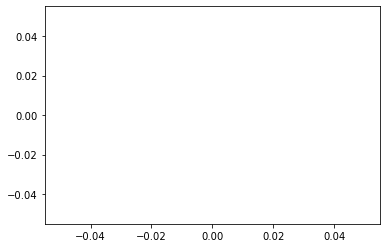

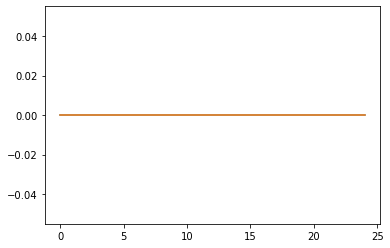

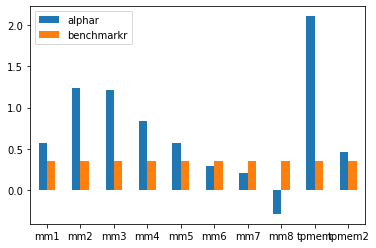

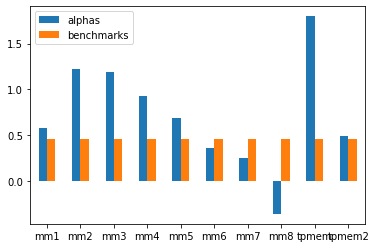

In [202]:
sig=get_signalact2(kalpha57(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [203]:
# (-1 * Ts_Rank(decay_linear(correlation(IndNeutralize(vwap, IndClass.sector), volume, 3.92795), 7.89291), 5.50322)) 

def kalpha58(ohlcv_data):
    pass

In [204]:
# (-1 * Ts_Rank(decay_linear(correlation(IndNeutralize(((vwap * 0.728317) + (vwap * (1 - 0.728317))), IndClass.industry), volume, 4.25197), 16.2289), 8.19648))

def kalpha59(ohlcv_data):
    pass

In [210]:
def scale(df):
   
    return df.div(df.abs().sum(), axis=0)

In [211]:
 # (0 - (1 * ((2 * scale(rank(((((close - low) - (high - close)) / (high - low)) * volume)))) - scale(rank(ts_argmax(close, 10))))))

def kalpha60(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=(2*scale(cs_rank((((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'])-(ohlcv_data[i]['High']-ohlcv_data[i]['Close']))/(ohlcv_data[i]['High']-ohlcv_data[i]['Low']))*ohlcv_data[i]['Volume'])))
        b=scale(cs_rank(ohlcv_data[i]['Close'].rolling(window=10).apply(np.argmax).add(1)))
        kalpha.append(np.asarray(b-a))
    return getleneq(kalpha)[1]



In [212]:
kalpha60(ohlcv_data)

array([[            nan,             nan,             nan, ...,
        -3.03400636e-03, -3.09733056e-03, -3.07416613e-03],
       [            nan,             nan,             nan, ...,
        -2.62078590e-04, -2.83503824e-03, -3.21164724e-04],
       [            nan,             nan,             nan, ...,
        -1.98306076e-03, -2.97315981e-03, -1.78098039e-03],
       ...,
       [            nan,             nan,             nan, ...,
        -1.94602086e-03, -5.75730366e-04, -2.11077953e-03],
       [            nan,             nan,             nan, ...,
         7.80400358e-05, -2.11253198e-03, -1.28913422e-03],
       [            nan,             nan,             nan, ...,
        -1.99251996e-03, -2.24979724e-03, -1.59662923e-03]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


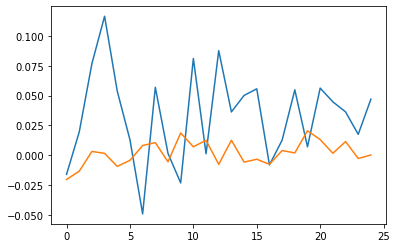

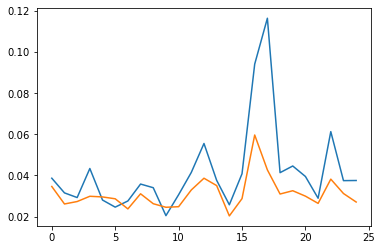

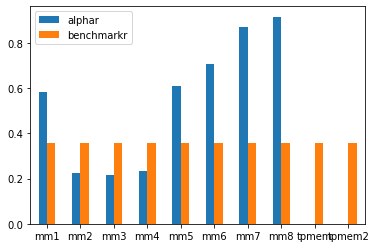

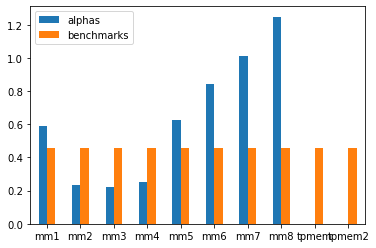

In [213]:
sig=get_signalact2(kalpha60(ohlcv_data),logrets(ohlcv_data), delay=1)

In [214]:
# (rank((vwap - ts_min(vwap, 16.1219))) < rank(correlation(vwap, adv180, 17.9282))) 

# def kalpha61(ohlcv_data):
#     kalpha=[]
#     for i in range(len(ohlcv_data)):
# #         a=vwap1(ohlcv_data).to_frame()
#         kalpha.append(np.asarray((cs_rank(vwap1(ohlcv_data)-vwap1(ohlcv_data).rolling(window=16).min())) < cs_rank(corr(vwap1(ohlcv_data), ohlcv_data[i]['Volume'].rollling(window=180).mean(), 17))))
#     return getleneq(kalpha)[1]

In [235]:
# a = pd.DataFrame(vwap1(ohlcv_data))
# type(a)

pandas.core.frame.DataFrame

In [230]:
# vwap1(ohlcv_data)
# type(vwap1(ohlcv_data))

pandas.core.series.Series

In [248]:
# def ax(ohlcv_data):
#     for i in range(len(ohlcv_data)):
#         a=ohlcv_data[i]['Volume']
#     return a

In [250]:
# type(ax(ohlcv_data))

pandas.core.series.Series

In [ ]:
# np.reshape(kalpha61(ohlcv_data)[1:], (25175,2))

In [279]:
# (rank((vwap - ts_min(vwap, 16.1219))) < rank(correlation(vwap, adv180, 17.9282))) 

# def kalpha61(ohlcv_data):
#     kalpha=[]
#     for i in range(len(ohlcv_data)):
#         a=pd.DataFrame(vwap1(ohlcv_data))
#         c=pd.DataFrame(ohlcv_data[i]['Volume'])
        
#         kalpha.append(np.asarray(cs_rank((a-a.rolling(window=16).min())) < cs_rank(corr(a, c.rolling(window=180).mean(), 17))))
#     return getleneq(kalpha)[1]

In [298]:
a=pd.DataFrame(vwap1(ohlcv_data))
d=a-a.rolling(window=16).min()
print(cs_rank(d))

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1002,0.760081
1003,0.743952
1004,0.723790
1005,0.707661


In [328]:
def k(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=pd.DataFrame(vwap1(ohlcv_data))
        
        c=ohlcv_data[i]['Volume'].rolling(window=180).mean()
        b=pd.DataFrame(c)
        x=corr(a, b, 17)
        v=cs_rank(x)
    return np.asarray(v)

In [329]:
k(ohlcv_data)

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [332]:
y=k(ohlcv_data).flatten()
(y)

array([nan, nan, nan, ..., nan, nan, nan])

In [354]:
y

2014

In [350]:
a=pd.DataFrame(vwap1(ohlcv_data))
d=a-a.rolling(window=16).min()

q=np.asarray(cs_rank(d))
z=q.flatten()
z

array([       nan,        nan,        nan, ..., 0.72379032, 0.70766129,
       0.69657258])

In [361]:
# (rank((vwap - ts_min(vwap, 16.1219))) < rank(correlation(vwap, adv180, 17.9282))) 
def kalpha61(ohlcv_data, y,z):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        
        e=z<y[1007:]
        
        kalpha.append(e)
    return getleneq(kalpha)[1]

In [362]:
kalpha61(ohlcv_data, y, z).shape

(26, 1007)

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


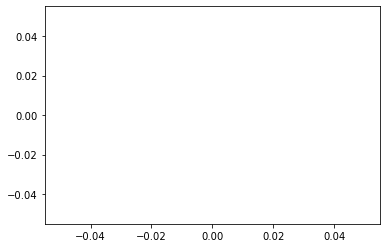

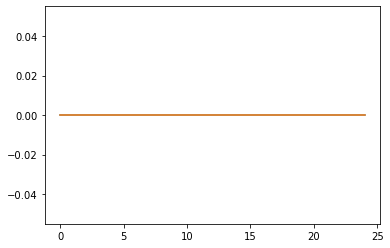

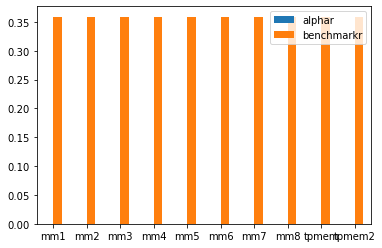

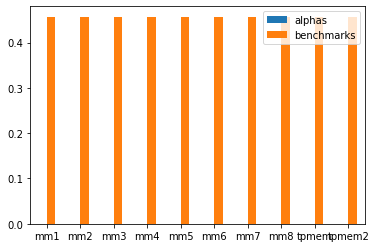

In [358]:
sig=get_signalact2(kalpha61(ohlcv_data,y,z)[1:],logrets(ohlcv_data), delay=1)

In [428]:
# ((rank(correlation(vwap, sum(adv20, 22.4101), 9.91009)) < rank(((rank(open) + rank(open)) < (rank(((high + low) / 2)) + rank(high))))) * -1) 

# def kalpha62(ohlcv_data):
#     kalpha=[]
#     for i in range(len(ohlcv_data)):
#         a=cs_rank(corr(vwap1(ohlcv_data),((ohlcv_data[i]['Volume'].rolling(window=20).mean()).rolling(window=22).sum()), 10))
#         b=cs_rank((cs_rank(ohlcv_data[i]['Open'])*2)<(cs_rank((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+cs_rank(ohlcv_data[i]['High'])))
#         kalpha.append(np.asarray(-(a<b)))
#     return getleneq(kalpha)[1]

In [469]:
def z(ohlcv_data):
    
    for i in range(len(ohlcv_data)):
        a=ohlcv_data[i]['Volume'].rolling(window=20).mean()
        b=cs_rank(corr(vwap1(ohlcv_data), a.rolling(window=22).sum(), 10))
    return np.asarray(b)
z(ohlcv_data).shape               

(1007,)

In [467]:
n=z(ohlcv_data)

In [466]:
def y(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=cs_rank((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+cs_rank(ohlcv_data[i]['High'])
        b=cs_rank((ohlcv_data[i]['Open'])*2)
#         c=cs_rank((ohlcv_data[i]['Open'])*2)<(cs_rank((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+(cs_rank(ohlcv_data[i]['High'])))
#         d=cs_rank(c)
        x=cs_rank(b<a)
    return x
y(ohlcv_data).shape 

(1007,)

In [468]:
m=y(ohlcv_data)

In [472]:
# ((rank(correlation(vwap, sum(adv20, 22.4101), 9.91009)) < rank(((rank(open) + rank(open)) < (rank(((high + low) / 2)) + rank(high))))) * -1) 


def kalpha62(ohlcv_data, n, m):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        h=(-(n<m))
        kalpha.append(h)
    return getleneq(kalpha)[1]

    



(26, 1007)

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

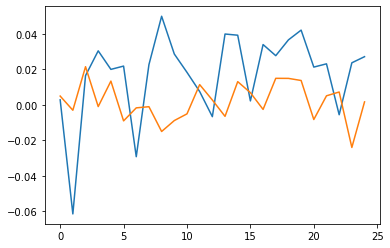

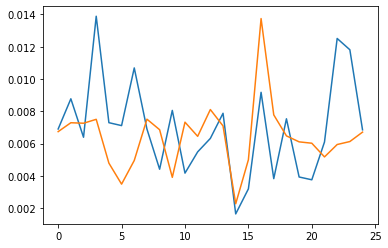

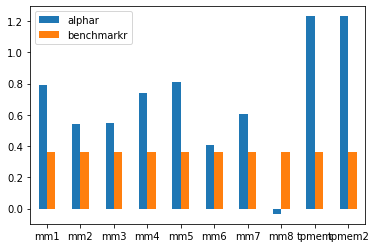

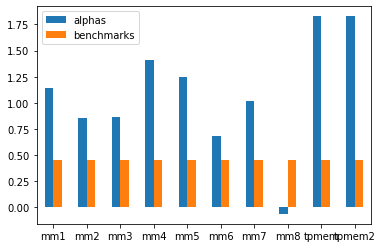

In [473]:
sig=get_signalact2(kalpha62(ohlcv_data,n,m)[1:],logrets(ohlcv_data), delay=1)

In [476]:
# ((rank(decay_linear(delta(IndNeutralize(close, IndClass.industry), 2.25164), 8.22237)) - rank(decay_linear(correlation(((vwap * 0.318108) + (open * (1 - 0.318108))), sum(adv180, 37.2467), 13.557), 12.2883))) * -1)

def kalpha63(ohlcv_data):
    pass

In [516]:
def q(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.178404
        a=((ohlcv_data[i]['Open']*w)+(ohlcv_data[i]['Low']*(1-w))).rolling(window=13).sum()        
        b=ohlcv_data[i]['Volume'].rolling(window=120).mean()
        c=b.rolling(window=13).sum()
        d=cs_rank(corr(a,c,17))
        return np.asarray(d)
    
q(ohlcv_data).shape

(1007,)

In [524]:
u=q(ohlcv_data)

In [518]:
def g(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.178404
        x=((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)*w)+(vwap1(ohlcv_data)*(1-w)))
        y=x-x.shift(4)
        z=cs_rank(y)
        return np.asarray(z)
    
g(ohlcv_data).shape

(1007,)

In [525]:
v=g(ohlcv_data)

In [532]:
# ((rank(correlation(sum(((open * 0.178404) + (low * (1 - 0.178404))), 12.7054), sum(adv120, 12.7054), 16.6208)) 
# < rank(delta(((((high + low) / 2) * 0.178404) + (vwap * (1 - 0.178404))), 3.69741))) * -1)

def kalpha64(ohlcv_data, u, v):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        
        p=(u<v)*(-1)
        kalpha.append(p)
    return getleneq(kalpha)[1]

# kalpha64(ohlcv_data, m, n)


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


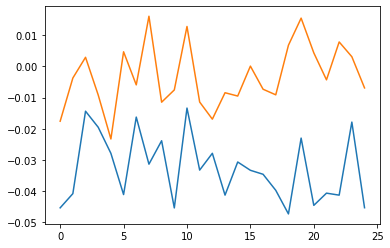

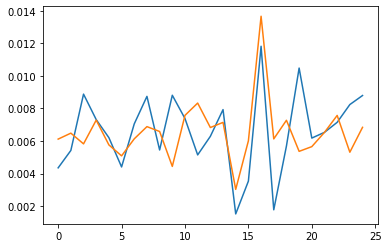

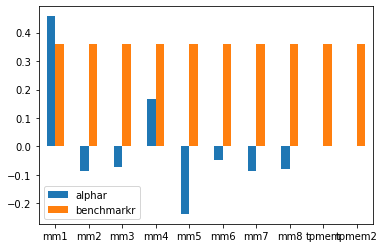

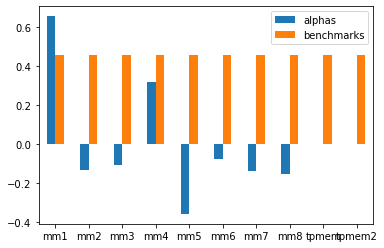

In [533]:
sig=get_signalact2(kalpha64(ohlcv_data, u, v)[1:],logrets(ohlcv_data), delay=1)

In [536]:
def h(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.00817205
        a=(ohlcv_data[i]['Open']*w)+(vwap1(ohlcv_data)*(1-w))
        b=ohlcv_data[i]['Volume'].rolling(window=60).mean()
        c=b.rolling(window=9).sum()
        d=cs_rank(corr(a, c, 6))
        
    return np.asarray(d)

h(ohlcv_data).shape

(1007,)

In [537]:
s=h(ohlcv_data)

In [540]:
def j(ohlcv_data):
    for i in range(len(ohlcv_data)):
        s=cs_rank(ohlcv_data[i]['Open']-ohlcv_data[i]['Open'].rolling(window=14).min())
    return np.asarray(s)

j(ohlcv_data).shape

(1007,)

In [541]:
t=j(ohlcv_data)

In [545]:
# ((rank(correlation(((open * 0.00817205) + (vwap * (1 - 0.00817205))), sum(adv60, 8.6911), 6.40374)) 
# < rank((open - ts_min(open, 13.635)))) * -1)

def kalpha65(ohlcv_data, s, t):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        y=(s<t)*(-1)
        kalpha.append(np.asarray(y))
    return getleneq(kalpha)[1]

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


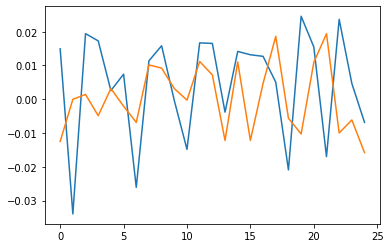

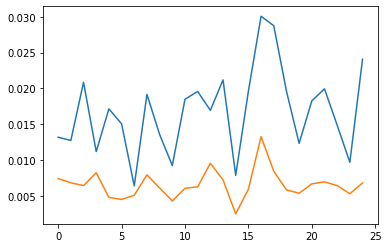

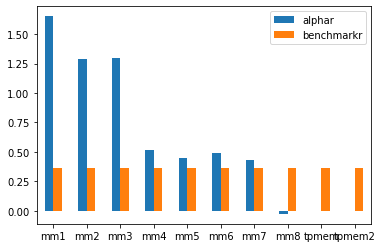

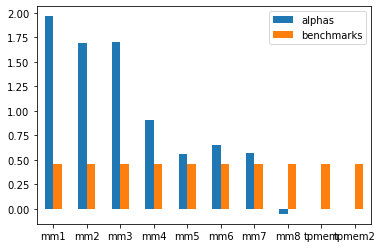

In [547]:
sig=get_signalact2(kalpha65(ohlcv_data, s, t)[1:],logrets(ohlcv_data), delay=1)

In [625]:
def bu(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.96633
        a=((((ohlcv_data[i]['Low'])*w)+((ohlcv_data[i]['Low'])*(1-w)))-vwap1(ohlcv_data))/(ohlcv_data[i]['Open']-((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2))
        iy=pd.DataFrame(a)
        fg=iy.fillna(0)
        ou=fg.apply(lambda e: WMA(e, timeperiod=11))
        ac=ou.fillna(0)
        tf=ts_rank(ac, 7)
        
        
    return np.asarray(tf)
bu(ohlcv_data)


array([[nan],
       [nan],
       [nan],
       ...,
       [ 4.],
       [ 4.],
       [ 4.]])

In [631]:
dg=bu(ohlcv_data).flatten()
dg

array([nan, nan, nan, ...,  4.,  4.,  4.])

In [627]:
def sd(ohlcv_data):
    for i in range(len(ohlcv_data)):
        dr=vwap1(ohlcv_data)-vwap1(ohlcv_data).shift(4)
        de=pd.DataFrame(dr)
        ew=de.apply(lambda d: WMA(d, timeperiod=7))
        gb=cs_rank(ew)
        
    return np.asarray(gb)

sd(ohlcv_data)

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.6890672 ],
       [0.68405216],
       [0.67502508]])

In [630]:
ws=sd(ohlcv_data).flatten()
ws

array([       nan,        nan,        nan, ..., 0.6890672 , 0.68405216,
       0.67502508])

In [632]:
# ((rank(decay_linear(delta(vwap, 3.51013), 7.23052)) + 
# Ts_Rank(decay_linear(((((low * 0.96633) + (low * (1 - 0.96633))) - vwap) / (open - ((high + low) / 2))), 11.4157), 6.72611)) * -1) 

def kalpha66(ohlcv_data, ws, dg):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        des=(ws+dg)*(-1)
        
        kalpha.append(des)
    return getleneq(kalpha)[1]
                
kalpha66(ohlcv_data, ws, dg)

array([[        nan,         nan,         nan, ..., -4.6890672 ,
        -4.68405216, -4.67502508],
       [        nan,         nan,         nan, ..., -4.6890672 ,
        -4.68405216, -4.67502508],
       [        nan,         nan,         nan, ..., -4.6890672 ,
        -4.68405216, -4.67502508],
       ...,
       [        nan,         nan,         nan, ..., -4.6890672 ,
        -4.68405216, -4.67502508],
       [        nan,         nan,         nan, ..., -4.6890672 ,
        -4.68405216, -4.67502508],
       [        nan,         nan,         nan, ..., -4.6890672 ,
        -4.68405216, -4.67502508]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


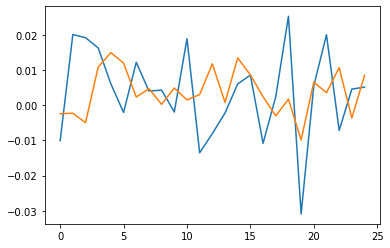

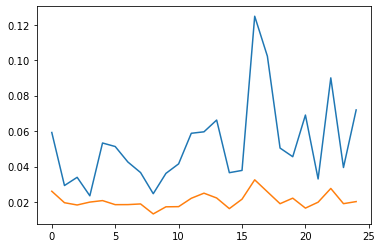

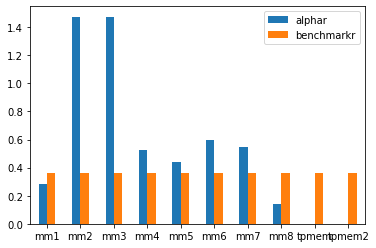

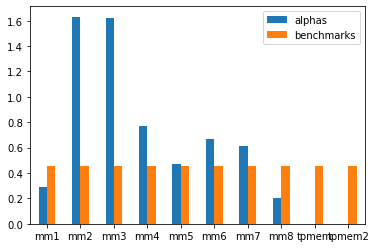

In [634]:
sig=get_signalact2(kalpha66(ohlcv_data, ws, dg)[1:],logrets(ohlcv_data), delay=1)

In [635]:
# ((rank((high - ts_min(high, 2.14593)))^rank(correlation(IndNeutralize(vwap, 
# IndClass.sector), IndNeutralize(adv20, IndClass.subindustry), 6.02936))) * -1) 

def kalpha67(ohlcv_data, vwap):
    pass

In [636]:
def rt(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.518371
        a=ts_rank(corr(cs_rank(ohlcv_data[i]['High']), cs_rank(ohlcv_data[i]['Volume'].rolling(window=15).mean()),9), 14)
    return np.asarray(a)

rt(ohlcv_data)
        

array([nan, nan, nan, ...,  1.,  1.,  1.])

In [640]:
dj=rt(ohlcv_data)

In [642]:
def rw(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.518371
        b=((ohlcv_data[i]['Close']*w)+(ohlcv_data[i]['Low']*(1-w)))
        do=b-b.shift(1)
        dhj=cs_rank(do)
    return np.asarray(dhj)

rw(ohlcv_data)
        

array([       nan, 0.70477137, 0.49701789, ..., 0.77137177, 0.98310139,
       0.26242545])

In [643]:
rh=rw(ohlcv_data)

In [ ]:
def kalpha68(ohlcv_data, rh, dj):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        
        

In [647]:
# ((Ts_Rank(correlation(rank(high), rank(adv15), 8.91644), 13.9333) < 
# rank(delta(((close * 0.518371) + (low * (1 - 0.518371))), 1.06157))) * -1) 
    
def kalpha68(ohlcv_data,dj,rh):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        gj=(dj<rh)*(-1)
        
        kalpha.append(np.asarray(gj))
    return getleneq(kalpha)[1]
        

kalpha68(ohlcv_data,dj,rh)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


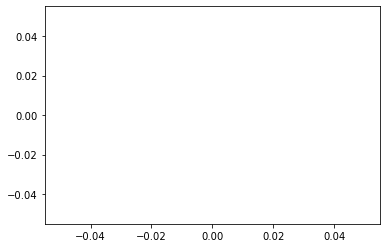

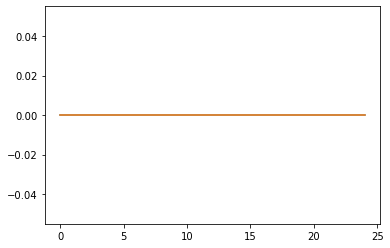

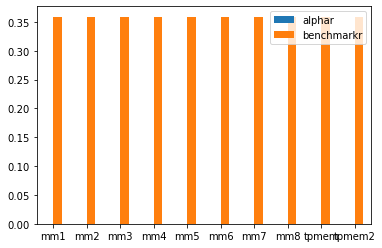

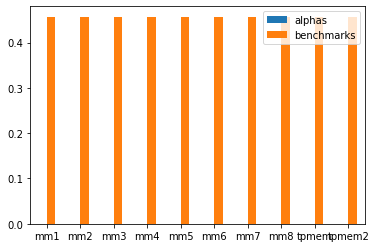

In [648]:
sig=get_signalact2(kalpha68(ohlcv_data, dj, rh)[1:],logrets(ohlcv_data), delay=1)

In [649]:
# ((rank(ts_max(delta(IndNeutralize(vwap, IndClass.industry), 2.72412), 
# 4.79344))^Ts_Rank(correlation(((close * 0.490655) + (vwap * (1 - 0.490655))), adv20, 4.92416), 
# 9.0615)) * -1) 

def kalpha69(vwap, ohlcv_data):
    pass


In [650]:
# ((rank(delta(vwap, 1.29456))^Ts_Rank(correlation(IndNeutralize(close, 
# IndClass.industry), adv50, 17.8256), 17.9171)) * -1) 

def kalpha70(vwap, ohlcv_data):
    pass

In [654]:
def hj(ohlcv_data):
    for i in range(len(ohlcv_data)):
        ij=corr(ts_rank(ohlcv_data[i]['Close'], 3), ts_rank(ohlcv_data[i]['Volume'].rolling(window=180).mean(), 12), 18)
        dk=pd.DataFrame(ij)
        sf=dk.apply(lambda k: WMA(k, timeperiod=4))
        dl=ts_rank(sf, 15)
    return np.asarray(sf)
hj(ohlcv_data)    

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [655]:
fk=hj(ohlcv_data).flatten()
fk

array([nan, nan, nan, ..., nan, nan, nan])

In [657]:
def gu(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=cs_rank((ohlcv_data[i]['Low']+ohlcv_data[i]['Open'])-(vwap1(ohlcv_data)*2))**2
        b=pd.DataFrame(a)
        uj=b.fillna(0)
        bt=uj.apply(lambda j: WMA(j, timeperiod=16))
        bh=bt.fillna(0)
        wd=ts_rank(bh, 4)
        
    return np.asarray(wd)

gu(ohlcv_data)
        
        

array([[nan],
       [nan],
       [nan],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [658]:
gn=gu(ohlcv_data).flatten()
gn

array([nan, nan, nan, ...,  1.,  1.,  1.])

In [669]:
# max(Ts_Rank(decay_linear(correlation(Ts_Rank(close, 3.43976), Ts_Rank(adv180, 12.0647), 18.0175), 4.20501), 15.6948),
#     Ts_Rank(decay_linear((rank(((low + open) - (vwap + vwap)))^2), 16.4662), 4.4388)) 

def kalpha71(ohlcv_data, gn,fk):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        dh=np.maximum(fk,gn)
        kalpha.append(np.asarray(dh))
    return getleneq(kalpha)[1]

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


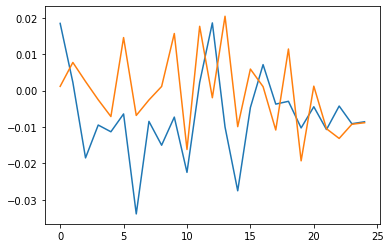

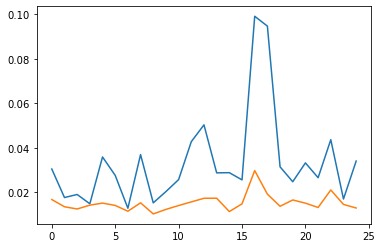

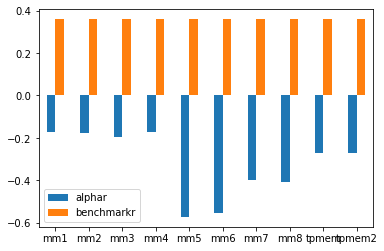

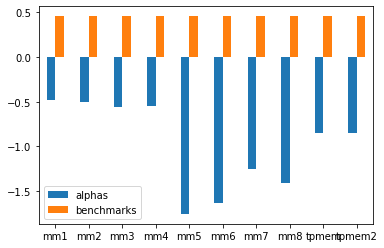

In [671]:
sig=get_signalact2(kalpha71(ohlcv_data, gn, fk)[1:],logrets(ohlcv_data), delay=1)

In [676]:
def kr(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2), (ohlcv_data[i]['Volume'].rolling(window=40).mean()), 9)
        du=pd.DataFrame(a)
        dl=du.apply(lambda h: WMA(h, timeperiod=10))
        dp=cs_rank(dl)
    return np.asarray(dp)
kr(ohlcv_data)
    

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.87592008],
       [0.79600421],
       [0.69821241]])

In [677]:
gy=kr(ohlcv_data).flatten()
gy

array([       nan,        nan,        nan, ..., 0.87592008, 0.79600421,
       0.69821241])

In [680]:
def yh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        jn=corr(ts_rank(vwap1(ohlcv_data), 4), ts_rank(ohlcv_data[i]['Volume'], 19), 7)
        u1=pd.DataFrame(jn)
        ul=u1.fillna(0)
        
        g=ul.apply(lambda g: WMA(g, timeperiod=3))
        gy=g.fillna(0)
        rb=cs_rank(gy)
    return np.asarray(rb)

yh(ohlcv_data)
        

array([[0.88232373],
       [0.88232373],
       [0.88232373],
       ...,
       [0.10427011],
       [0.10327706],
       [0.10228401]])

In [681]:
dv=yh(ohlcv_data).flatten()
dv

array([0.88232373, 0.88232373, 0.88232373, ..., 0.10427011, 0.10327706,
       0.10228401])

In [682]:
# (rank(decay_linear(correlation(((high + low) / 2), adv40, 8.93345), 10.1519)) / 
# rank(decay_linear(correlation(Ts_Rank(vwap, 3.72469), Ts_Rank(volume, 18.5188), 6.86671), 2.95011)))

def kalpha72(ohlcv_data, gy, dv):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        tg=gy/dv
        kalpha.append(np.asarray(tg))
    return getleneq(kalpha)[1]


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


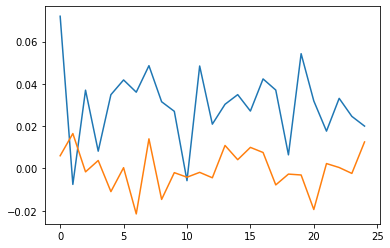

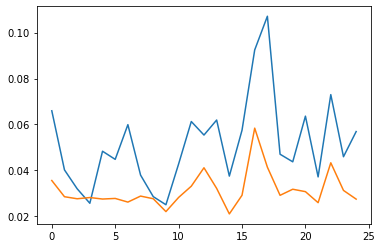

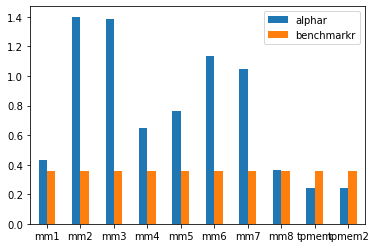

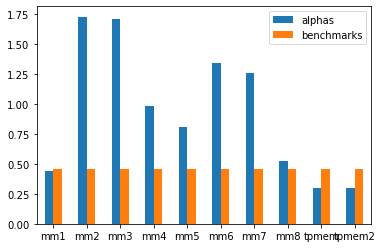

In [683]:
sig=get_signalact2(kalpha71(ohlcv_data, gy, dv)[1:],logrets(ohlcv_data), delay=1)

In [687]:
def gp(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=vwap1(ohlcv_data)-vwap1(ohlcv_data).shift(5)
        b=pd.DataFrame(a)
        ft=b.apply(lambda l: WMA(l, timeperiod=3))
        fo=cs_rank(ft)
    return np.asarray(fo)
gp(ohlcv_data)

array([[  nan],
       [  nan],
       [  nan],
       ...,
       [0.682],
       [0.674],
       [0.666]])

In [688]:
xp=gp(ohlcv_data).flatten()
xp

array([  nan,   nan,   nan, ..., 0.682, 0.674, 0.666])

In [689]:
def rm(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.147155
        x=((ohlcv_data[i]['Open'])*w)+((ohlcv_data[i]['Low'])*(1-w))
        y=x-x.shift(2)
        z=(y/x)*(-1)
        g=pd.DataFrame(z)
        dh=g.apply(lambda q: WMA(q, timeperiod=3))
        fp=ts_rank(dh, 17)
    return np.asarray(fp)

rm(ohlcv_data)
        

array([[nan],
       [nan],
       [nan],
       ...,
       [16.],
       [ 7.],
       [ 1.]])

In [690]:
ar=rm(ohlcv_data).flatten()
ar

array([nan, nan, nan, ..., 16.,  7.,  1.])

In [692]:
# (max(rank(decay_linear(delta(vwap, 4.72775), 2.91864)), 
# Ts_Rank(decay_linear(((delta(((open * 0.147155) + (low * (1 - 0.147155))), 2.03608) / ((open * 0.147155) + (low * (1 - 0.147155)))) * -1), 3.33829), 16.7411)) * -1) 


def kalpha73(ohlcv_data, ar, xp):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        rw=np.maximum(ar, xp)
        rq=rw*(-1)
        kalpha.append(np.asarray(rq))
    return getleneq(kalpha)[1]
        
        
kalpha73(ohlcv_data, ar, xp)

array([[ nan,  nan,  nan, ..., -16.,  -7.,  -1.],
       [ nan,  nan,  nan, ..., -16.,  -7.,  -1.],
       [ nan,  nan,  nan, ..., -16.,  -7.,  -1.],
       ...,
       [ nan,  nan,  nan, ..., -16.,  -7.,  -1.],
       [ nan,  nan,  nan, ..., -16.,  -7.,  -1.],
       [ nan,  nan,  nan, ..., -16.,  -7.,  -1.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


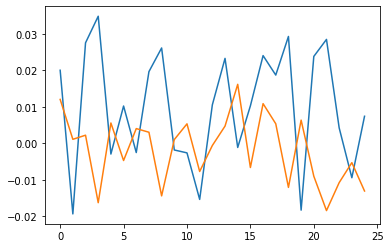

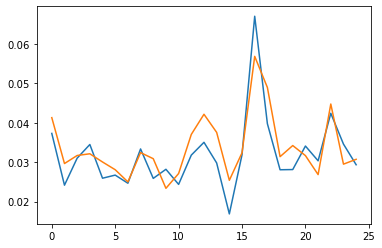

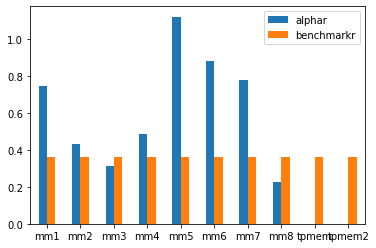

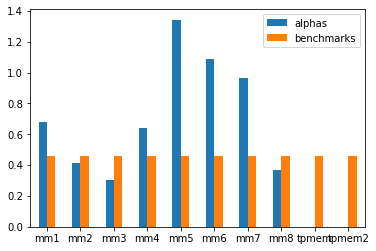

In [693]:
sig=get_signalact2(kalpha73(ohlcv_data, ar, xp)[1:],logrets(ohlcv_data), delay=1)

In [694]:
def gt(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=ohlcv_data[i]['Volume'].rolling(window=30).mean()
        r=w.rolling(window=37).sum()
        cs=cs_rank(corr(ohlcv_data[i]['Close'], r, 15))
    return np.asarray(cs)

gt(ohlcv_data)

array([       nan,        nan,        nan, ..., 0.98491379, 0.97198276,
       0.96551724])

In [698]:
se=gt(ohlcv_data)

In [695]:
def gh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        w=0.0261661
        b=cs_rank(corr(cs_rank((ohlcv_data[i]['High']*w)+(vwap1(ohlcv_data)*(1-w))), cs_rank(ohlcv_data[i]['Volume']), 11))
    return np.asarray(b)
gh(ohlcv_data)

array([       nan,        nan,        nan, ..., 0.09729188, 0.09227683,
       0.25075226])

In [697]:
bh=gh(ohlcv_data)

In [699]:
# ((rank(correlation(close, sum(adv30, 37.4843), 15.1365)) < 
# rank(correlation(rank(((high * 0.0261661) + (vwap * (1 - 0.0261661)))), rank(volume), 11.4791))) * -1) 

def kalpha74(ohlcv_data,bh, se):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        ef=se<bh
        dh=(ef)*(-1)
        kalpha.append(np.asarray(dh))
    return getleneq(kalpha)[1]


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


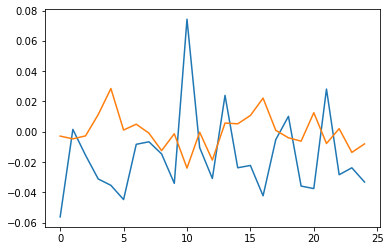

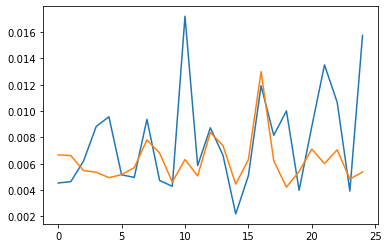

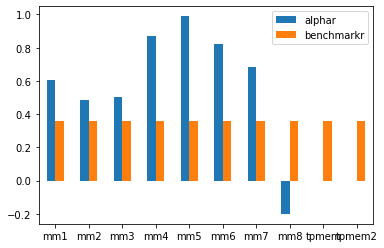

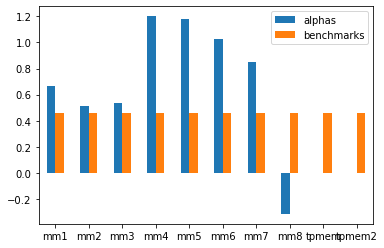

In [700]:
sig=get_signalact2(kalpha74(ohlcv_data, se, bh)[1:],logrets(ohlcv_data), delay=1)

In [703]:
def fh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=cs_rank(corr(vwap1(ohlcv_data),ohlcv_data[i]['Volume'],4))
    return np.asarray(a)

fh(ohlcv_data)
        

array([       nan,        nan,        nan, ..., 0.7998008 , 0.2749004 ,
       0.01593625])

In [707]:
t=fh(ohlcv_data)

In [704]:
def ru(ohlcv_data):
    for i in range(len(ohlcv_data)):
        b=cs_rank(corr(cs_rank(ohlcv_data[i]['Low']), cs_rank(ohlcv_data[i]['Volume'].rolling(window=50).mean()), 12))
    return np.asarray(b)

ru(ohlcv_data)
        

array([       nan,        nan,        nan, ..., 0.69165787, 0.79619852,
       0.7719113 ])

In [708]:
v=ru(ohlcv_data)

In [709]:
# (rank(correlation(vwap, volume, 4.24304)) < rank(correlation(rank(low), rank(adv50), 12.4413)))

def kalpha75(ohlcv_data, v, t):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        u=t<v
        
        kalpha.append(np.asarray(u))
    return getleneq(kalpha)[1]

kalpha75(ohlcv_data, v, t)

array([[False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

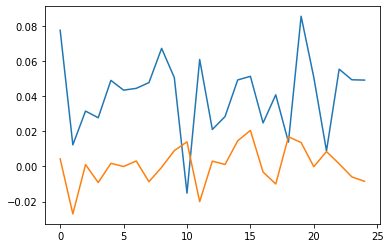

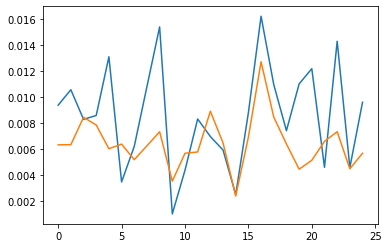

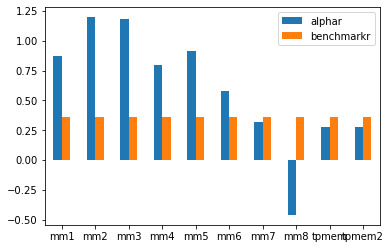

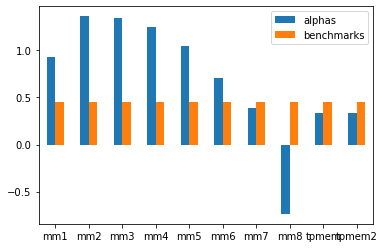

In [710]:
sig=get_signalact2(kalpha75(ohlcv_data, v, t)[1:],logrets(ohlcv_data), delay=1)

In [711]:
# (rank(correlation(vwap, volume, 4.24304)) < rank(correlation(rank(low), rank(adv50), 
# 12.4413)))

def kalpha76(ohlcv_data):
    pass

In [723]:
def ws(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+ohlcv_data[i]['High'])-(vwap1(ohlcv_data)+ohlcv_data[i]['High']))
        bi=pd.DataFrame(a)
        b=bi.fillna(0)
        djt=b.apply(lambda y: WMA(y, timeperiod=20))
        dj=djt.fillna(0)
        hu=cs_rank(dj)
    return np.asarray(hu)

#     return a
ws(ohlcv_data)
        
    

array([[0.56206554],
       [0.56206554],
       [0.56206554],
       ...,
       [0.9612711 ],
       [0.95531281],
       [0.95034757]])

In [724]:
qwe=ws(ohlcv_data).flatten()

In [728]:
def rgh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        g=corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2), ohlcv_data[i]['Volume'].rolling(window=40).mean(),3)
        dky=pd.DataFrame(g)
        dk=dky.fillna(0)
        eh=dk.apply(lambda k: WMA(k, timeperiod=6))
        ew=eh.fillna(0)
        wt=cs_rank(ew)
        
    return np.asarray(wt)

wui=rgh(ohlcv_data).flatten()

In [733]:
# min(rank(decay_linear(((((high + low) / 2) + high) - (vwap + high)), 20.0451)), 
# rank(decay_linear(correlation(((high + low) / 2), adv40, 3.1614), 5.64125))) 

def kalpha77(ohlcv_data, wui, qwe):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        lop=np.minimum(wui, qwe)
        
        kalpha.append(np.asarray(lop))
    return getleneq(kalpha)[1]

1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


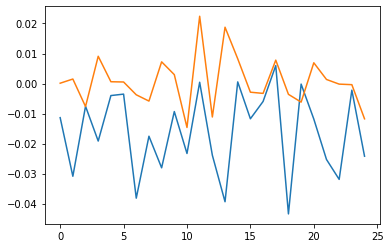

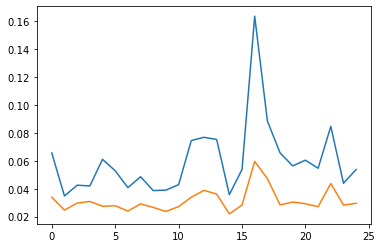

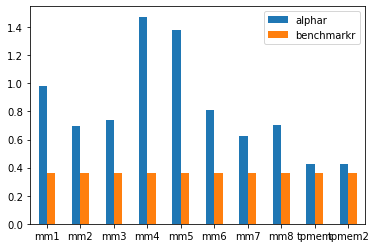

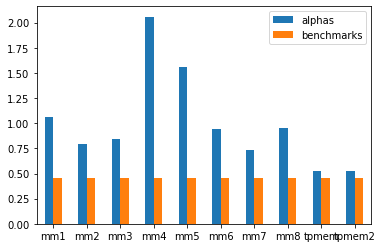

In [734]:
sig=get_signalact2(kalpha77(ohlcv_data, wui, qwe)[1:],logrets(ohlcv_data), delay=1)

In [738]:
# (rank(correlation(sum(((low * 0.352233) + (vwap * (1 - 0.352233))), 19.7428), sum(adv40, 19.7428), 6.83313))
#  ^rank(correlation(rank(vwap), rank(volume), 5.77492)))

def kalpha78(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        w=0.352233
        x=ohlcv_data[i]['Volume'].rolling(window=40).mean()
        p=x.rolling(window=20).sum()
        a=cs_rank(corr(((ohlcv_data[i]['Low']*w)+(vwap1(ohlcv_data)*(1-w))).rolling(window=20).sum(),p, 7))
        b=cs_rank(corr(cs_rank(vwap1(ohlcv_data)),cs_rank(ohlcv_data[i]['Volume']), 6))
        fg=a**b
        kalpha.append(np.asarray(fg))
    return getleneq(kalpha)[1]
        
kalpha78(ohlcv_data)

array([[       nan,        nan,        nan, ..., 0.8892611 , 0.9355345 ,
        0.90456577],
       [       nan,        nan,        nan, ..., 0.90857758, 0.70522748,
        0.61715212],
       [       nan,        nan,        nan, ..., 0.73574568, 0.83052677,
        0.96283018],
       ...,
       [       nan,        nan,        nan, ..., 0.9496589 , 0.94466011,
        0.98427176],
       [       nan,        nan,        nan, ..., 0.62327175, 0.6823814 ,
        0.80196999],
       [       nan,        nan,        nan, ..., 0.93959407, 0.9931708 ,
        0.99798586]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


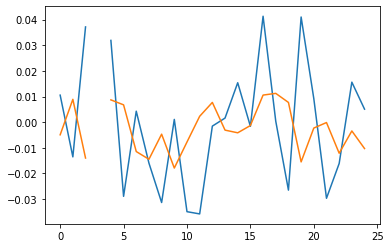

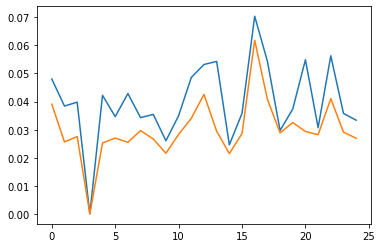

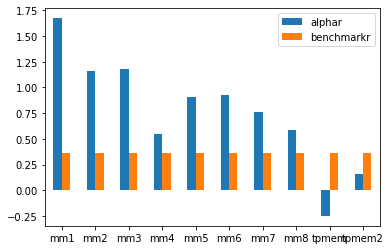

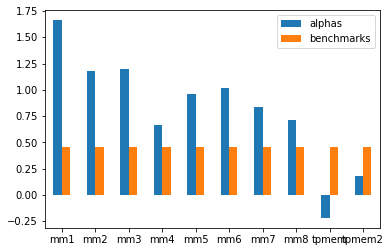

In [739]:
sig=get_signalact2(kalpha78(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [740]:
# (rank(delta(IndNeutralize(((close * 0.60733) + (open * (1 - 0.60733))), 
# IndClass.sector), 1.23438)) < rank(correlation(Ts_Rank(vwap, 3.60973), Ts_Rank(adv150, 
# 9.18637), 14.6644)))


def kalpha79(ohlcv_data):
    pass

In [741]:
# ((rank(Sign(delta(IndNeutralize(((open * 0.868128) + (high * (1 - 0.868128))), 
# IndClass.industry), 4.04545)))^Ts_Rank(correlation(high, adv10, 5.11456), 5.53756)) * -1)

def kalpha80(ohlcv_data):
    pass

In [743]:
# ((rank(Log(product(rank((rank(correlation(vwap, sum(adv10, 49.6054), 8.47743))^4)), 14.9655))) 
# < rank(correlation(rank(vwap), rank(volume), 5.07914))) * -1)

def kalpha81(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        g=ohlcv_data[i]['Volume'].rolling(window=10).mean()
        gy=g.rolling(window=50).sum()
        a=cs_rank(np.log1p((cs_rank(cs_rank(corr(vwap1(ohlcv_data),gy, 8))**4)).rolling(window=15).apply(np.prod)))
        b=cs_rank(corr(cs_rank(vwap1(ohlcv_data)),cs_rank(ohlcv_data[i]['Volume']),5))
        ft=(a<b)*(-1)
        kalpha.append(np.asarray(ft))
    return getleneq(kalpha)[1]

kalpha81(ohlcv_data)

array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ...,  0, -1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1, -1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., -1, -1,  0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


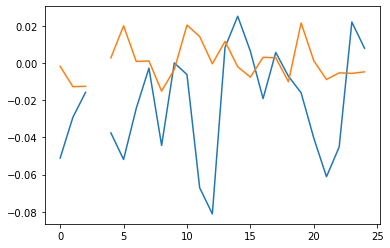

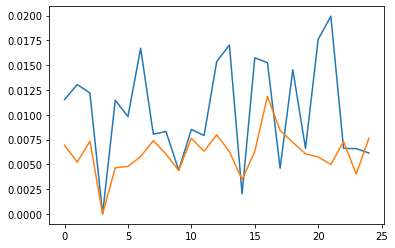

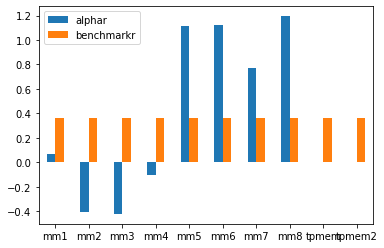

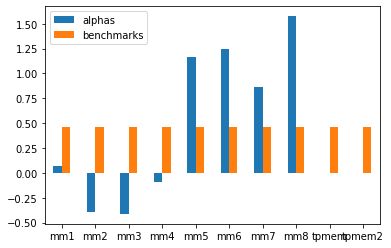

In [744]:
sig=get_signalact2(kalpha81(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [746]:
# (min(rank(decay_linear(delta(open, 1.46063), 14.8717)), 
# Ts_Rank(decay_linear(correlation(IndNeutralize(volume, IndClass.sector), ((open * 0.634196) + 
# (open * (1 - 0.634196))), 17.4842), 6.92131), 13.4283)) * -1)

def kalpha82(ohlcv_data):
    pass


In [747]:
# ((rank(delay(((high - low) / (sum(close, 5) / 5)), 2)) * rank(rank(volume))) / 
# (((high - low) / (sum(close, 5) / 5)) / (vwap - close)))


def kalpha83(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])/((ohlcv_data[i]['Close'].rolling(window=5).sum())/5))
        b=(cs_rank(a-a.shift(2))*cs_rank(cs_rank(ohlcv_data[i]['Volume'])))
        x=(((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])/((ohlcv_data[i]['Close'].rolling(window=5).sum())/5))/(vwap1(ohlcv_data)-ohlcv_data[i]['Close']))
        y=(b/x)
        
        kalpha.append(np.asarray(y))
    return getleneq(kalpha)[1]

kalpha83(ohlcv_data)

array([[         nan,          nan,          nan, ..., 331.69324537,
        423.65606255, 227.16504216],
       [         nan,          nan,          nan, ..., 377.97406296,
        371.44024092, 362.59318827],
       [         nan,          nan,          nan, ...,  -5.0320821 ,
        -61.75040032,  -9.70213865],
       ...,
       [         nan,          nan,          nan, ..., 401.25439993,
        123.20232502,  56.01544473],
       [         nan,          nan,          nan, ..., -26.80543316,
        -33.57221177, -14.6036875 ],
       [         nan,          nan,          nan, ..., -13.0766927 ,
        -49.41957587, -14.4860525 ]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


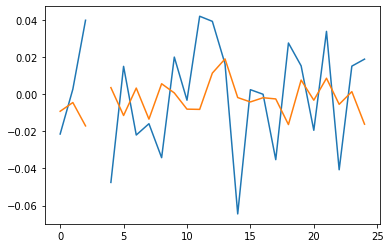

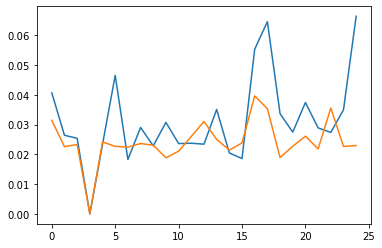

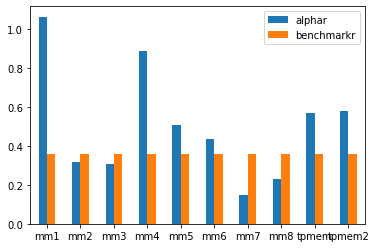

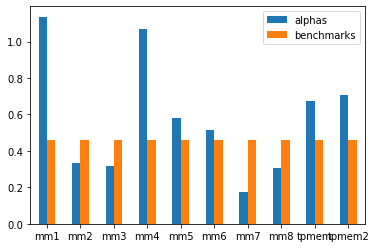

In [748]:
sig=get_signalact2(kalpha83(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [750]:
# SignedPower(Ts_Rank((vwap - ts_max(vwap, 15.3217)), 20.7127), delta(close, 4.96796)) 


def kalpha84(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        g=ts_rank((vwap1(ohlcv_data)-((vwap1(ohlcv_data)).rolling(window=15).max())),21)**(ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].shift(5))
        
        kalpha.append(np.asarray(g))
    return getleneq(kalpha)[1]

kalpha84(ohlcv_data)

array([[           nan,            nan,            nan, ...,
        1.93123780e-03, 2.41304234e-01, 6.28462585e-01],
       [           nan,            nan,            nan, ...,
        5.76773278e-03, 2.10423942e-01, 1.50418003e-01],
       [           nan,            nan,            nan, ...,
        6.35993571e-06, 2.10424904e-01, 3.74132284e-01],
       ...,
       [           nan,            nan,            nan, ...,
        6.04742483e-02, 4.64252936e-01, 4.87060588e-01],
       [           nan,            nan,            nan, ...,
        6.08421114e-12, 8.07351123e-04, 3.57260342e-04],
       [           nan,            nan,            nan, ...,
        7.52221814e-06, 1.43461204e-02, 1.21293436e-02]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


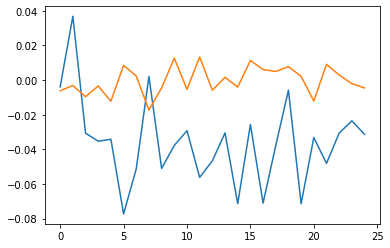

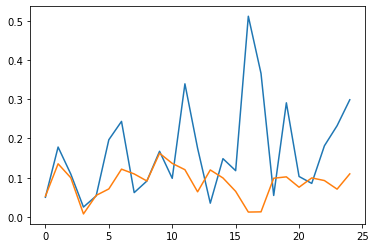

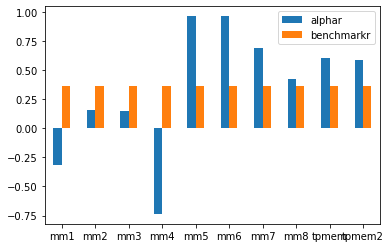

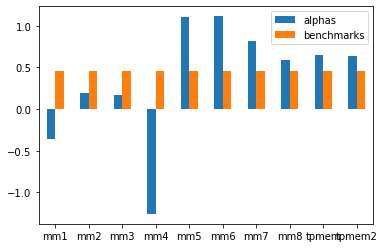

In [751]:
sig=get_signalact2(kalpha84(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [752]:
# (rank(correlation(((high * 0.876703) + (close * (1 - 0.876703))), adv30, 9.61331))
# ^rank(correlation(Ts_Rank(((high + low) / 2), 3.70596), Ts_Rank(volume, 10.1595), 7.11408))) 


def kalpha85(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        w=0.876703
        a=cs_rank(corr(((ohlcv_data[i]['High']*w)+(ohlcv_data[i]['Close']*(1-w))),(ohlcv_data[i]['Volume'].rolling(window=30).mean()),10))
        b=cs_rank(corr(ts_rank(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2), 4),ts_rank(ohlcv_data[i]['Volume'], 10),7))
        k=(a**b)
        kalpha.append(np.asarray(k))
    return getleneq(kalpha)[1]
        
    
kalpha85(ohlcv_data)

array([[       nan,        nan,        nan, ..., 0.98488424, 0.96316636,
        0.93403782],
       [       nan,        nan,        nan, ..., 0.94552169, 0.90482483,
        0.92464869],
       [       nan,        nan,        nan, ..., 0.71617535, 0.52642327,
        0.82974012],
       ...,
       [       nan,        nan,        nan, ..., 0.96420757, 0.90735457,
        0.94291283],
       [       nan,        nan,        nan, ..., 0.85494694, 0.96306934,
        0.99355465],
       [       nan,        nan,        nan, ..., 0.83341244, 0.85082628,
        0.83091502]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


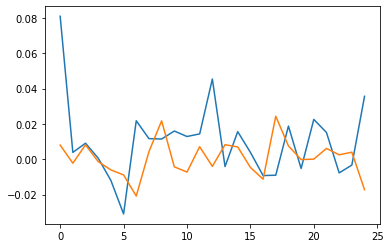

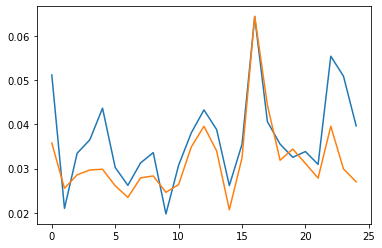

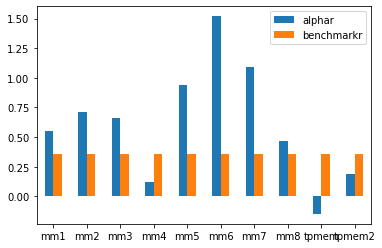

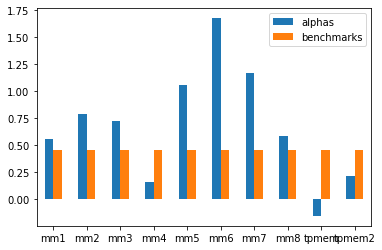

In [754]:
sig=get_signalact2(kalpha85(ohlcv_data),logrets(ohlcv_data), delay=1)

In [765]:
def st(ohlcv_data):
    for i in range(len(ohlcv_data)):
        h=(ohlcv_data[i]['Volume'].rolling(window=20).mean())
        j=h.rolling(window=15).sum()
        a=ts_rank(corr(ohlcv_data[i]['Close'],j,6),20)
    return np.asarray(a)

ex=st(ohlcv_data)
ex        

array([nan, nan, nan, ..., 18., 14., 10.])

In [766]:
def ny(ohlcv_data):
    for i in range(len(ohlcv_data)):
        b=cs_rank((ohlcv_data[i]['Open']+ohlcv_data[i]['Close'])-(vwap1(ohlcv_data)+ohlcv_data[i]['Open']))
    return np.asarray(b)

tr=ny(ohlcv_data)
tr
        

array([0.56007944, 0.56802383, 0.56901688, ..., 0.74577954, 0.8857994 ,
       0.85799404])

In [768]:
# ((Ts_Rank(correlation(close, sum(adv20, 14.7444), 6.00049), 20.4195) 
#   < rank(((open + close) - (vwap + open)))) * -1) 

def kalpha86(ohlcv_data,ex,tr):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        
        z=(ex<tr)*(-1)
        kalpha.append(np.asarray(z))
    return getleneq(kalpha)[1]
    
kalpha86(ohlcv_data, ex, tr)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


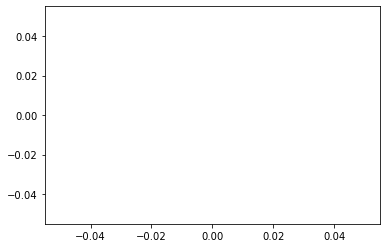

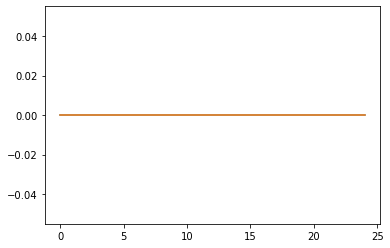

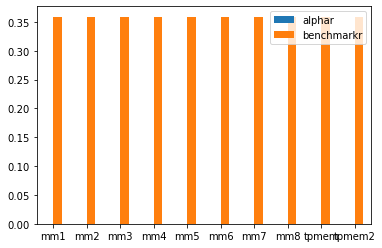

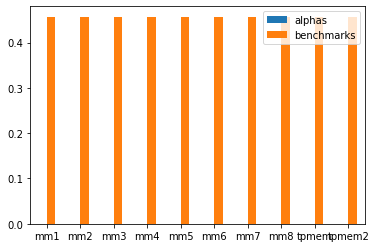

In [770]:
sig=get_signalact2(kalpha86(ohlcv_data, ex, tr)[1:],logrets(ohlcv_data), delay=1)

In [771]:
# (max(rank(decay_linear(delta(((close * 0.369701) + (vwap * (1 - 0.369701))), 
# 1.91233), 2.65461)), Ts_Rank(decay_linear(abs(correlation(IndNeutralize(adv81, 
# IndClass.industry), close, 13.4132)), 4.89768), 14.4535)) * -1)

def kalpha87(ohlcv_data, vwap):
    pass

In [781]:
def ry(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=((cs_rank(ohlcv_data[i]['Open'])+cs_rank(ohlcv_data[i]['Low']))-(cs_rank(ohlcv_data[i]['High'])+cs_rank(ohlcv_data[i]['Close'])))
        b=pd.DataFrame(a)
        c=b.fillna(0)
        d=c.apply(lambda h: WMA(h, timeperiod=8))
        d1=d.fillna(0)
        e=cs_rank(d1)
    return np.asarray(e)

rg=ry(ohlcv_data).flatten()
rg

array([0.44190665, 0.44190665, 0.44190665, ..., 0.29692155, 0.31976167,
       0.43098312])

In [780]:
def ro(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=corr(ts_rank(ohlcv_data[i]['Close'],8),ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(),21),8)
        b=pd.DataFrame(a)
        c=b.fillna(0)
        d=b.apply(lambda y: WMA(y, timeperiod=6))
        e=d.fillna(0)
        f=ts_rank(e,3)
    return np.asarray(f)
et=ro(ohlcv_data).flatten()
et

array([nan, nan,  2., ...,  2.,  2.,  2.])

In [779]:
# min(rank(decay_linear(((rank(open) + rank(low)) - (rank(high) + rank(close))), 8.06882)),
# Ts_Rank(decay_linear(correlation(Ts_Rank(close, 8.44728), Ts_Rank(adv60, 20.6966), 8.01266), 6.65053), 2.61957))


def kalpha88(ohlcv_data, rg, et):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        out=np.minimum(rg,et)
        kalpha.append(np.asarray(out))
    return getleneq(kalpha)[1]

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


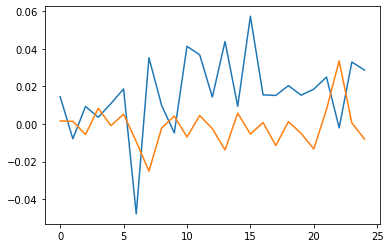

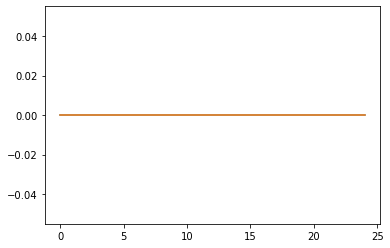

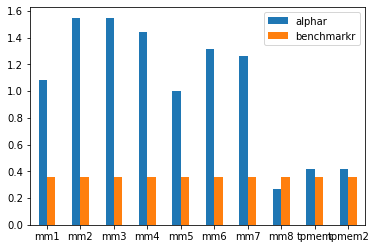

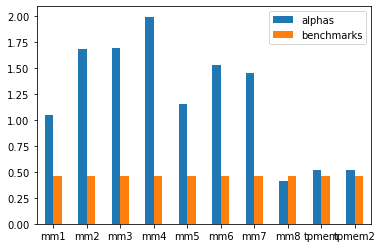

In [782]:
sig=get_signalact2(kalpha88(ohlcv_data, rg, et)[1:],logrets(ohlcv_data), delay=1)

In [783]:
# (Ts_Rank(decay_linear(correlation(((low * 0.967285) + (low * (1 - 0.967285))), adv10, 
# 6.94279), 5.51607), 3.79744) - Ts_Rank(decay_linear(delta(IndNeutralize(vwap, 
# IndClass.industry), 3.48158), 10.1466), 15.3012)) 


def kalpha89(ohlcv_data, vwap):
    pass

In [784]:
# ((rank((close - ts_max(close, 4.66719)))^Ts_Rank(correlation(IndNeutralize(adv40, 
# IndClass.subindustry), low, 5.38375), 3.21856)) * -1) 


def kalpha90(ohlcv_data):
    pass

In [785]:
# ((Ts_Rank(decay_linear(decay_linear(correlation(IndNeutralize(close, 
# IndClass.industry), volume, 9.74928), 16.398), 3.83219), 4.8667) - 
# rank(decay_linear(correlation(vwap, adv30, 4.01303), 2.6809))) * -1) 

def kalpha91(ohlcv_data, vwap):
    pass

In [789]:
def gh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+ohlcv_data[i]['Close'])<(ohlcv_data[i]['Low']+ohlcv_data[i]['Open']))
        b=pd.DataFrame(a)
        c=b.fillna(0)
        d=c.apply(lambda g: WMA(g, timeperiod=14))
        e=d.fillna(0)
        f=ts_rank(e, 18)
    return np.asarray(f)

dt=gh(ohlcv_data).flatten()
dt

array([ nan,  nan,  nan, ..., 11. ,  6.5, 16. ])

In [791]:
def rg(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=corr(cs_rank(ohlcv_data[i]['Low']), cs_rank(ohlcv_data[i]['Volume'].rolling(window=30).mean()), 8)
        b=pd.DataFrame(a)
        c=b.fillna(0)
        d=c.apply(lambda c: WMA(c, timeperiod=7))
        e=d.fillna(0)
        f=ts_rank(e, 7)
    return np.asarray(f)
    
df=rg(ohlcv_data).flatten()
df

array([nan, nan, nan, ...,  1.,  1.,  1.])

In [793]:
# min(Ts_Rank(decay_linear(((((high + low) / 2) + close) < (low + open)), 14.7221), 18.8683), 
# Ts_Rank(decay_linear(correlation(rank(low), rank(adv30), 7.58555), 6.94024), 6.80584))
    

    
def kalpha92(ohlcv_data, df, dt):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        se=np.minimum(df, dt)
        kalpha.append(np.asarray(se))
    return getleneq(kalpha)[1]
        
kalpha92(ohlcv_data, df, dt)
    

array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


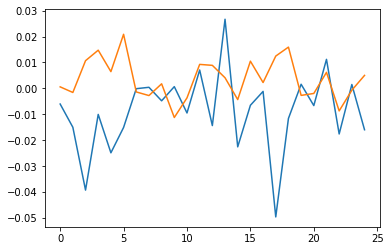

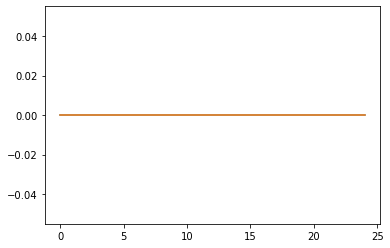

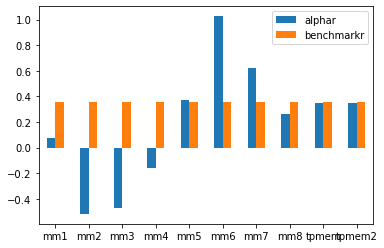

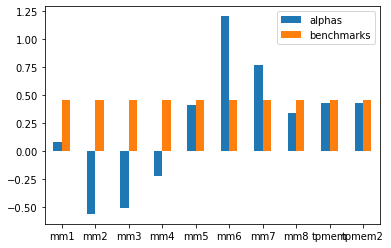

In [794]:
sig=get_signalact2(kalpha92(ohlcv_data, df, dt)[1:],logrets(ohlcv_data), delay=1)

In [795]:
# (Ts_Rank(decay_linear(correlation(IndNeutralize(vwap, IndClass.industry), adv81, 
# 17.4193), 19.848), 7.54455) / rank(decay_linear(delta(((close * 0.524434) + (vwap * (1 - 
# 0.524434))), 2.77377), 16.2664))) 

def kalpha93(ohlcv_data):
    pass

In [798]:
# ((rank((vwap - ts_min(vwap, 11.5783)))
# ^Ts_Rank(correlation(Ts_Rank(vwap, 19.6462), Ts_Rank(adv60, 4.02992), 18.0926), 2.70756)) * -1) 


def kalpha94(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=ts_rank(corr(ts_rank(vwap1(ohlcv_data), 20), ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(), 4), 18),3)
        b=cs_rank(vwap1(ohlcv_data)-vwap1(ohlcv_data).rolling(window=12).min())
        c=(b**a)*(-1)
        kalpha.append(np.asarray(c))
    return getleneq(kalpha)[1]
kalpha94(ohlcv_data)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


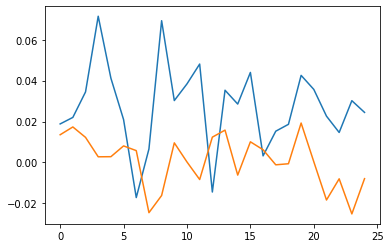

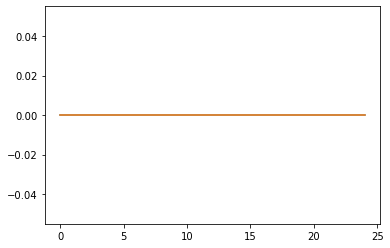

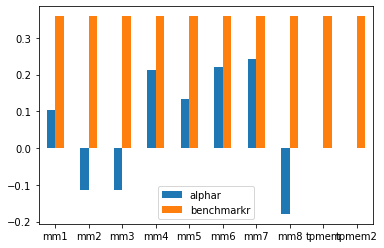

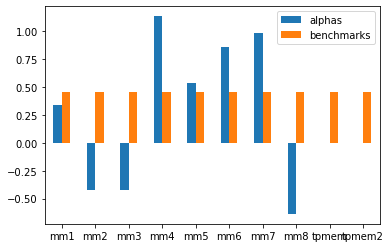

In [799]:
sig=get_signalact2(kalpha94(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [802]:
def rh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=ohlcv_data[i]['Volume'].rolling(window=40).mean()
        b=a.rolling(window=19).sum()
        c=ts_rank((cs_rank(corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2).rolling(window=19).sum(),b,13))**5),12)
    return np.asarray(c)
rt=rh(ohlcv_data)
rt
        

array([nan, nan, nan, ...,  8., 11., 12.])

In [804]:

def ka(ohlcv_data):
    for i in range(len(ohlcv_data)):
        d=cs_rank(ohlcv_data[i]['Open']-ohlcv_data[i]['Open'].rolling(window=12).min())
    return np.asarray(d)
rd=ka(ohlcv_data)
rd

array([       nan,        nan,        nan, ..., 0.08383534, 0.49598394,
       0.65261044])

In [806]:
# (rank((open - ts_min(open, 12.4105))) 
#  < Ts_Rank((rank(correlation(sum(((high + low) / 2), 19.1351), sum(adv40, 19.1351), 12.8742))^5), 11.7584)) 

def kalpha95(ohlcv_data, rd, rt):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        tg=rd<rt
        kalpha.append(np.asarray(tg))
    return getleneq(kalpha)[1]

kalpha95(ohlcv_data, rd, rt)

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


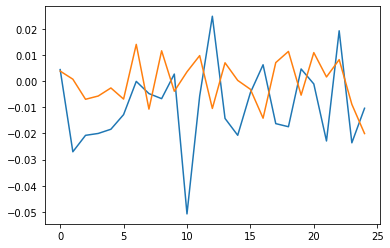

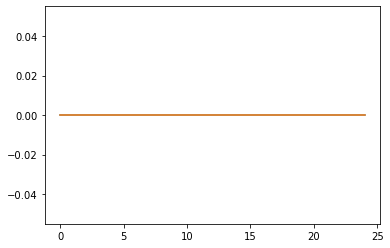

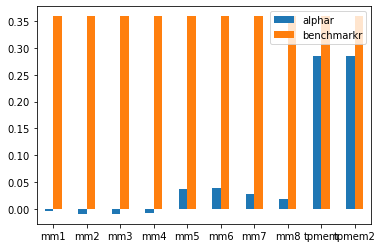

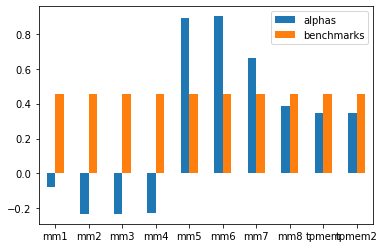

In [807]:
sig=get_signalact2(kalpha95(ohlcv_data, rd, rt)[1:],logrets(ohlcv_data), delay=1)

In [812]:
def gh(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=corr(cs_rank(vwap1(ohlcv_data)),cs_rank(ohlcv_data[i]['Volume']), 4)
        b=pd.DataFrame(a)
        c=b.fillna(0)
        d=c.apply(lambda f: WMA(f, timeperiod= 4))
        e=d.fillna(0)
        g=ts_rank(e, 8)
    return np.asarray(g)
rf=gh(ohlcv_data).flatten()

In [814]:
def rk(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=corr(ts_rank(ohlcv_data[i]['Close'],7), ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(),4),4)
        b=a.rolling(window=12).apply(np.argmax).add(1)
        c=pd.DataFrame(b)
        d=c.fillna(0)
        e=d.apply(lambda r: WMA(r, timeperiod=14))
        f=ts_rank(e, 13)
    return np.array(f)

rt=rk(ohlcv_data).flatten()
           
       

In [821]:
# (max(Ts_Rank(decay_linear(correlation(rank(vwap), rank(volume), 3.83878), 4.16783), 8.38151),
# Ts_Rank(decay_linear(Ts_ArgMax(correlation(Ts_Rank(close, 7.45404), Ts_Rank(adv60, 4.13242), 3.65459), 12.6556), 14.0365), 13.4143)) * -1) 


def kalpha96(ohlcv_data, rf, rt):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        gh=np.maximum(rf, rt)
        gt=gh*(-1)
        
        kalpha.append(np.asarray(gt))
    return getleneq(kalpha)[1]
        

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


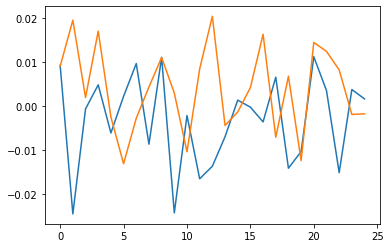

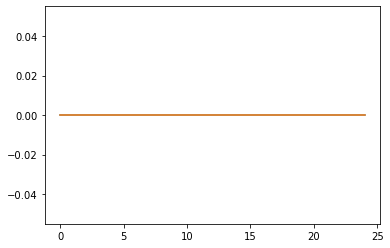

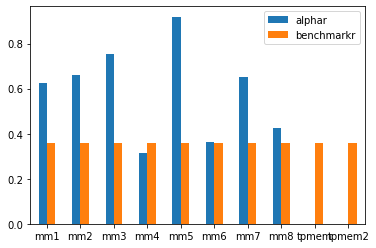

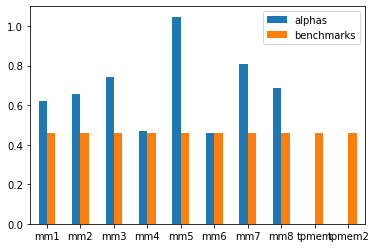

In [822]:
sig=get_signalact2(kalpha96(ohlcv_data, rf, rt)[1:],logrets(ohlcv_data), delay=1)

In [823]:
# ((rank(decay_linear(delta(IndNeutralize(((low * 0.721001) + (vwap * (1 - 0.721001))), 
# IndClass.industry), 3.3705), 20.4523)) - Ts_Rank(decay_linear(Ts_Rank(correlation(Ts_Rank(low, 
# 7.87871), Ts_Rank(adv60, 17.255), 4.97547), 18.5925), 15.7152), 6.71659)) * -1)

def kalpha97(ohlcv_data):
    pass



In [825]:
def it(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=ohlcv_data[i]['Volume'].rolling(window=5).mean()
        b=a.rolling(window=26).sum()
        c=corr(vwap1(ohlcv_data),b,5)
        d=pd.DataFrame(c)
        e=d.fillna(0)
        f=e.apply(lambda h: WMA(h, timeperiod=7))
        g=f.fillna(0)
        i=cs_rank(g)
    return np.asarray(i)
ita=it(ohlcv_data).flatten()
    

In [828]:
def bta(ohlcv_data):
    for i in range(len(ohlcv_data)):
        a=corr(cs_rank(ohlcv_data[i]['Open']), cs_rank(ohlcv_data[i]['Volume'].rolling(window=15).mean()),21)
        b=a.rolling(window=9).apply(np.argmin).add(1)
        c=pd.DataFrame(b)
        d=c.fillna(0)
        e=d.apply(lambda r: WMA(r, timeperiod=7))
        f=e.fillna(0)
        g=cs_rank(f)
    return np.asarray(g)
tf=bta(ohlcv_data).flatten()

In [829]:
# (rank(decay_linear(correlation(vwap, sum(adv5, 26.4719), 4.58418), 7.18088)) - 
# rank(decay_linear(Ts_Rank(Ts_ArgMin(correlation(rank(open), rank(adv15), 20.8187), 8.62571), 6.95668), 8.07206))) 


def kalpha98(ohlcv_data, ita, tf):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        ftg=ita-tf
        kalpha.append(np.asarray(ftg))
    return getleneq(kalpha)[1]

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


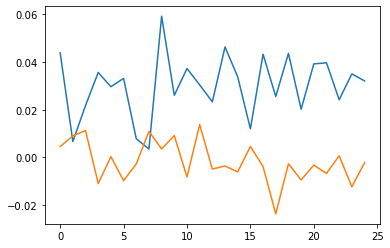

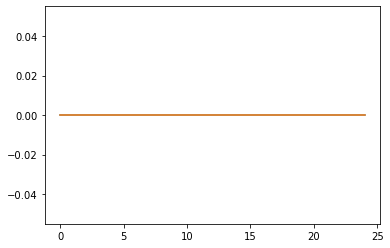

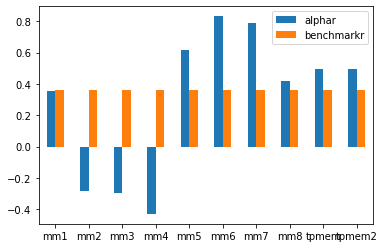

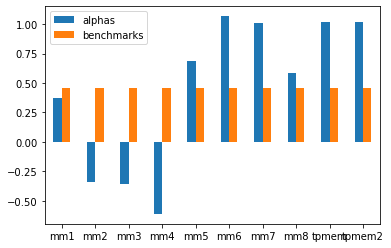

In [830]:
sig=get_signalact2(kalpha98(ohlcv_data, ita, tf)[1:],logrets(ohlcv_data), delay=1)

In [832]:
def rkl(ohlcv_data):
    for i in range(len(ohlcv_data)):
        t=ohlcv_data[i]['Volume'].rolling(window=60).mean()
        a=cs_rank(corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2).rolling(window=20).sum(),t.rolling(window=20).sum(),9))
    return np.asarray(a)
rfg=rkl(ohlcv_data).flatten()
rfg        

array([       nan,        nan,        nan, ..., 0.69489685, 0.68729642,
       0.68838219])

In [833]:
def gy(ohlcv_data):
    for i in range(len(ohlcv_data)):
        b=cs_rank(corr(ohlcv_data[i]['Low'], ohlcv_data[i]['Volume'],6))
    return np.asarray(b)

drt=gy(ohlcv_data).flatten()

In [835]:
# ((rank(correlation(sum(((high + low) / 2), 19.8975), sum(adv60, 19.8975), 8.8136)) < 
# rank(correlation(low, volume, 6.28259))) * -1) 


def kalpha99(ohlcv_data, rfg, drt):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        rhu=rfg<drt
        gio=(rhu)*(-1)
        
        
        kalpha.append(np.asarray(gio))
    return getleneq(kalpha)[1]
  
kalpha99(ohlcv_data, rfg, drt)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


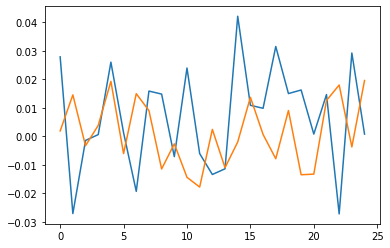

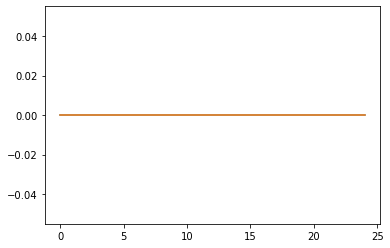

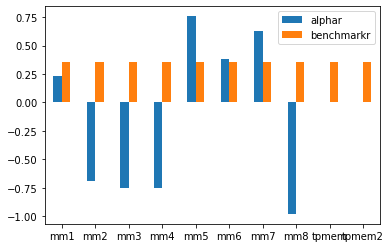

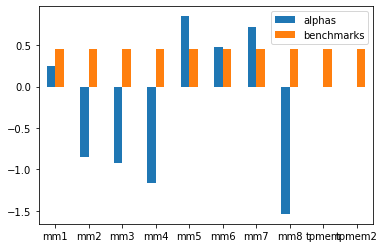

In [836]:
sig=get_signalact2(kalpha99(ohlcv_data, rfg, drt)[1:],logrets(ohlcv_data), delay=1)

In [837]:
# (0 - (1 * (((1.5 * scale(indneutralize(indneutralize(rank(((((close - low) - (high - 
# close)) / (high - low)) * volume)), IndClass.subindustry), IndClass.subindustry))) - 
# scale(indneutralize((correlation(close, rank(adv20), 5) - rank(ts_argmin(close, 30))), 
# IndClass.subindustry))) * (volume / adv20)))) 


def kalpha100(ohlcv_data):
    pass